In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob
import random
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from  keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from  tensorflow.keras import Input

In [3]:
size = (32,32,3)
torsize = (32,32)

In [4]:
input_image = Input(shape=(100, 100, 3))

In [5]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu'
                     ,input_shape=size,padding='same'
                     )
              )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [6]:
df = pd.read_csv('data/all_data_info.csv')
df

artist    date               genre  pixelsx  pixelsy  \
0                Barnett Newman  1955.0            abstract  15530.0   6911.0   
1                Barnett Newman  1950.0            abstract  14559.0   6866.0   
2                   kiri nichol  2013.0                 NaN   9003.0   9004.0   
3                   kiri nichol  2013.0                 NaN   9003.0   9004.0   
4                   kiri nichol  2013.0                 NaN   9003.0   9004.0   
...                         ...     ...                 ...      ...      ...   
103245          Jackson Pollock  1948.0            abstract    682.0    220.0   
103246         Bernardo Strozzi     NaN  religious painting    329.0    456.0   
103247               Josef Sima     NaN           landscape    293.0    512.0   
103248           Brett Whiteley  1982.0              marina    293.0    512.0   
103249  Amadeo de Souza-Cardoso    1913           landscape    293.0    512.0   

        size_bytes   source                 style                     title  \
0        9201912.0  wikiart  Color Field Painting                     Uriel   
1        8867532.0  wikiart  Color Field Painting     Vir Heroicus Sublimis   
2        1756681.0      NaN         Neoplasticism                       NaN   
3        1942046.0      NaN         Neoplasticism                       NaN   
4        1526212.0      NaN         Neoplasticism                       NaN   
...            ...      ...                   ...                       ...   
103245     96405.0  wikiart       Action painting    Number 13A (Arabesque)   
103246    127594.0  wikiart               Baroque     St. Francis of Assisi   
103247    102519.0  wikiart            Surrealism  Maisons à la campagne II   
103248    167423.0  wikiart                   NaN           Thebe's Revenge   
103249     77577.0  wikiart                Cubism            House Manhufe    

          artist_group  in_train new_filename  
0           train_only      True   102257.jpg  
1           train_only      True    75232.jpg  
2            test_only     False    32145.jpg  
3            test_only     False    20304.jpg  
4            test_only     False      836.jpg  
...                ...       ...          ...  
103245  train_and_test      True    25525.jpg  
103246      train_only      True    47038.jpg  
103247  train_and_test     False     7680.jpg  
103248  train_and_test      True     9021.jpg  
103249      train_only      True    36564.jpg  

[103250 rows x 12 columns]

In [7]:
dataset_paths = glob.glob("./data/train/*.jpg")



In [8]:
df['impath'] = df.new_filename.map(lambda x : f'./data/train/{x}' if f'./data/train/{x}' in dataset_paths else '' )


In [9]:
df=df[df['impath']!='']

In [10]:
df_samp = df.sample(2000)

In [11]:
def open_image(pathim):
    try:
        return np.array(Image.open(pathim).resize(torsize))
    except:
        return ''

In [12]:
df_samp['image'] = df_samp.new_filename.map(lambda x : open_image(f'./data/train/{x}'))

In [13]:
df_samp =df_samp[df_samp['image']!='']

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [14]:
df_samp['image_shape'] = df_samp.image.map(lambda x : x.shape )
df_samp= df_samp[df_samp['image_shape']==size]

In [15]:
df_samp['image_shape'].value_counts()

(32, 32, 3)    1975
Name: image_shape, dtype: int64

In [16]:
batch_size = 16
train_input_shape = (224, 224, 3)

In [17]:
X= df_samp.image
y=df_samp['artist']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
np.shape(X_train)

(1481,)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [20]:
X_train = np.array(list(X_train))

In [21]:
# def initialize_model():
    
#     # $CHALLENGIFY_BEGIN
#     model = Sequential()
#     model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
#     model.add(Dropout(0.3))
#     model.add(MaxPooling2D((2, 2)))
    
#     model.add(Flatten())
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(709, activation = 'softmax'))

#     model.compile(loss='categorical_crossentropy',
#               optimizer='adam', 
#               metrics=['accuracy'])
    
#     # $CHALLENGIFY_END    
    
#     return model

In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [23]:
# model = initialize_model()
# model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

In [24]:
test=np.array([np.array(Image.open('./data/train/1541.jpg').resize(torsize))])

In [25]:
#odel.predict(test)


## Limiting to most famous painter

In [26]:
famous_artists = list(df.artist.value_counts().head(20).keys())

In [27]:
df_famous = df[df.artist.isin(famous_artists)]

In [28]:
df_famous.artist.unique()

array(['Ivan Aivazovsky', 'Gustave Dore', 'Rembrandt', 'Edgar Degas',
       'Albrecht Durer', 'Theophile Steinlen',
       'Giovanni Battista Piranesi', 'Paul Cezanne',
       'John Singer Sargent', 'Vincent van Gogh', 'Childe Hassam',
       'Zdislav Beksinski', 'Camille Pissarro', 'Eugene Boudin',
       'Boris Kustodiev', 'Ilya Repin', 'Pierre-Auguste Renoir',
       'Martiros Saryan', 'Pyotr Konchalovsky', 'Pablo Picasso'],
      dtype=object)

In [29]:
df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))

/var/folders/bs/_70c1r1x1276_9vpf7t82hdr0000gn/T/ipykernel_4777/1592678099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous['image'] = df_famous.new_filename.map(lambda x :open_image(f'./data/train/{x}'))


In [30]:
df_famous=df_famous[df_famous['image']!='']
df_famous['image_shape'] = df_famous.image.map(lambda x : x.shape )
df_famous= df_famous[df_famous['image_shape']==size]

/Users/abdellatif/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [31]:
X= df_famous.image
y=df_famous['artist']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [34]:
def model_20():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(20, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [35]:
model = model_20()
history = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50


2022-10-20 18:50:10.091008: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


119/119 [==============================] - 1s 9ms/step - loss: 2.9823 - accuracy: 0.0643 - val_loss: 2.9605 - val_accuracy: 0.0656
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 2.8510 - accuracy: 0.1242 - val_loss: 2.7855 - val_accuracy: 0.1693
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 2.6902 - accuracy: 0.1676 - val_loss: 2.6661 - val_accuracy: 0.2116
Epoch 4/50
119/119 [==============================] - 1s 9ms/step - loss: 2.5688 - accuracy: 0.2123 - val_loss: 2.5827 - val_accuracy: 0.2296
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 2.4968 - accuracy: 0.2240 - val_loss: 2.6227 - val_accuracy: 0.1884
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 2.4251 - accuracy: 0.2436 - val_loss: 2.4294 - val_accuracy: 0.2963
Epoch 7/50
119/119 [==============================] - 1s 8ms/step - loss: 2.3612 - accuracy: 0.2706 - val_loss: 2.4006 - val_accuracy: 0.3005
Epoch 8/50
119/11

In [36]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

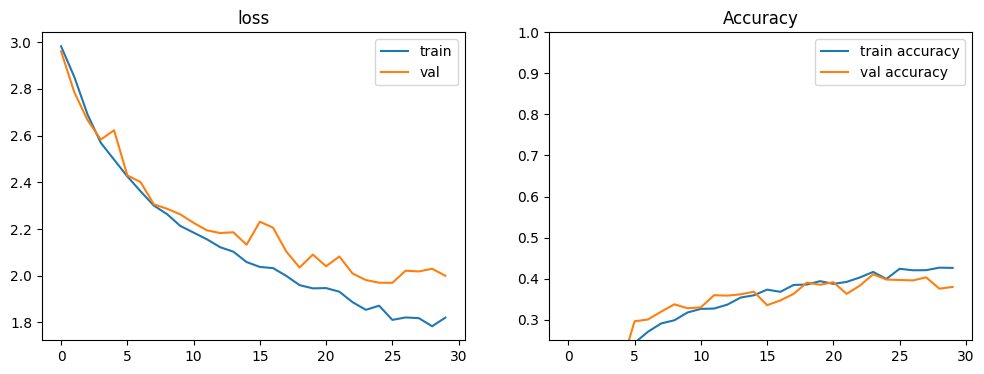

In [37]:
plot_history(history)
plt.savefig('history.jpg')

In [39]:
test = np.array([np.array(Image.open('./data/test/cmonet.jpg').resize(torsize))])


In [40]:
test.shape

(1, 32, 32, 3)

In [41]:
famous_artists[np.argmax(model.predict(test))]


1/1 [==============================] - 0s 56ms/step


'Martiros Saryan'

In [42]:
famous_artists

['Paul Cezanne',
 'Ilya Repin',
 'Edgar Degas',
 'Boris Kustodiev',
 'Giovanni Battista Piranesi',
 'Vincent van Gogh',
 'Pyotr Konchalovsky',
 'Martiros Saryan',
 'Childe Hassam',
 'John Singer Sargent',
 'Gustave Dore',
 'Theophile Steinlen',
 'Camille Pissarro',
 'Albrecht Durer',
 'Pierre-Auguste Renoir',
 'Ivan Aivazovsky',
 'Eugene Boudin',
 'Rembrandt',
 'Pablo Picasso',
 'Zdislav Beksinski']

## Data augmentation

In [43]:

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [44]:
len(X_train)*.8

3777.6000000000004

In [45]:
X_tr = X_train[:3777]
y_tr = y_train[:3777]
X_val = X_train[3777:]
y_val = y_train[3777:]


train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

model = model_20()

# The fit
history_aug = model.fit(train_flow, 
                        epochs = 50, 
                        callbacks = [es], 
                        validation_data = (X_val, y_val))

Epoch 1/50
60/60 [==============================] - 1s 19ms/step - loss: 6.2994 - accuracy: 0.0548 - val_loss: 2.9958 - val_accuracy: 0.0413
Epoch 2/50
60/60 [==============================] - 1s 18ms/step - loss: 2.9984 - accuracy: 0.0516 - val_loss: 2.9954 - val_accuracy: 0.0529
Epoch 3/50
60/60 [==============================] - 1s 18ms/step - loss: 2.9913 - accuracy: 0.0561 - val_loss: 2.9768 - val_accuracy: 0.0730
Epoch 4/50
60/60 [==============================] - 1s 19ms/step - loss: 2.9735 - accuracy: 0.0731 - val_loss: 2.9644 - val_accuracy: 0.0720
Epoch 5/50
60/60 [==============================] - 1s 18ms/step - loss: 2.9536 - accuracy: 0.0710 - val_loss: 2.9318 - val_accuracy: 0.0794
Epoch 6/50
60/60 [==============================] - 1s 18ms/step - loss: 2.9525 - accuracy: 0.0723 - val_loss: 2.9274 - val_accuracy: 0.0783
Epoch 7/50
60/60 [==============================] - 1s 19ms/step - loss: 2.9358 - accuracy: 0.0784 - val_loss: 2.9235 - val_accuracy: 0.0783
Epoch 8/50
60

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

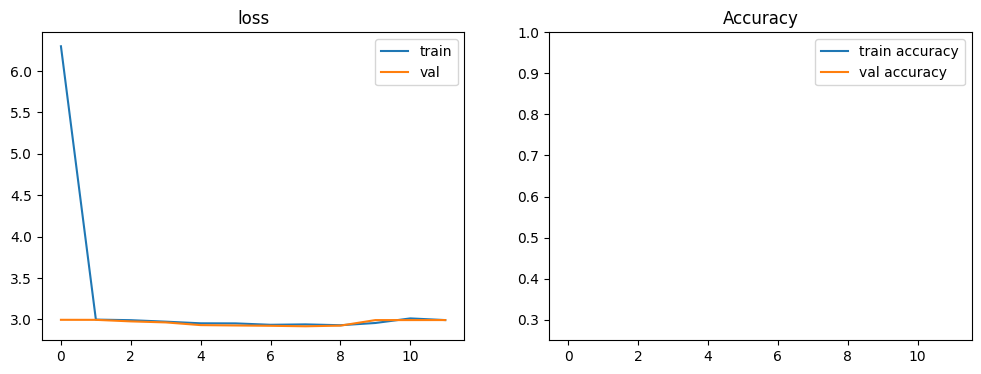

In [46]:
plot_history(history_aug)

## Get Picasso


In [38]:
df_famous['PabloPicasso'] = df_famous.artist.map(lambda x : 1 if x=='Pablo Picasso' else 0 )

In [39]:
X= df_famous.image
y=df_famous['PabloPicasso']




In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

In [42]:
def model_2():
    
    # $CHALLENGIFY_BEGIN
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=size))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
    
    # $CHALLENGIFY_END    
    
    return model

In [43]:
model = model_2()
history2 = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)

Epoch 1/50
119/119 [==============================] - 1s 9ms/step - loss: 0.2195 - accuracy: 0.9531 - val_loss: 0.2279 - val_accuracy: 0.9418
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1981 - accuracy: 0.9531 - val_loss: 0.2281 - val_accuracy: 0.9418
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1875 - accuracy: 0.9531 - val_loss: 0.2156 - val_accuracy: 0.9418
Epoch 4/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1702 - accuracy: 0.9531 - val_loss: 0.1948 - val_accuracy: 0.9418
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1631 - accuracy: 0.9534 - val_loss: 0.1944 - val_accuracy: 0.9418
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1572 - accuracy: 0.9526 - val_loss: 0.1951 - val_accuracy: 0.9418
Epoch 7/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1538 - accuracy: 0.9529 - val_loss: 0.1850 - val_accuracy: 0.9407
Epoch 

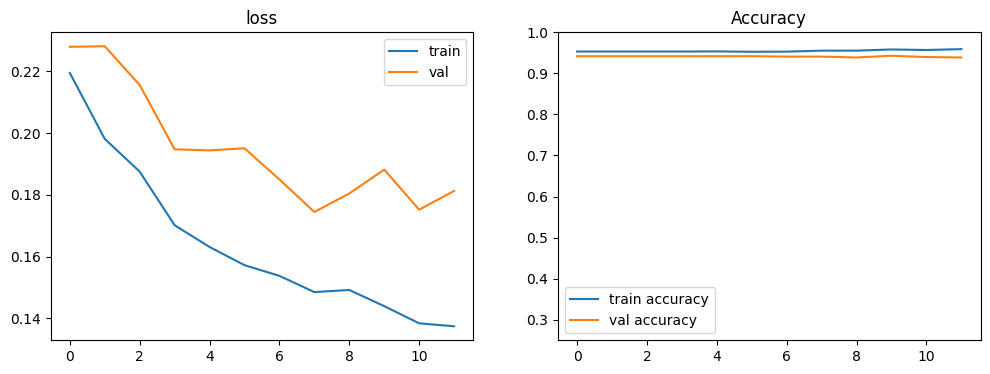

In [44]:
plot_history(history2)
plt.savefig('picasso_acc.jpg')

In [54]:
test = np.array([np.array(Image.open('./data/test/100004.jpg').resize(torsize))])
                 


In [55]:
model.predict(test)

1/1 [==============================] - 0s 45ms/step


array([[1.000000e+00, 8.859128e-18]], dtype=float32)

## Another one

In [45]:
df_famous.artist.unique()

array(['Ivan Aivazovsky', 'Gustave Dore', 'Rembrandt', 'Edgar Degas',
       'Theophile Steinlen', 'Albrecht Durer',
       'Giovanni Battista Piranesi', 'Paul Cezanne',
       'John Singer Sargent', 'Vincent van Gogh', 'Childe Hassam',
       'Zdislav Beksinski', 'Camille Pissarro', 'Eugene Boudin',
       'Boris Kustodiev', 'Ilya Repin', 'Pierre-Auguste Renoir',
       'Martiros Saryan', 'Pyotr Konchalovsky', 'Pablo Picasso'],
      dtype=object)

In [46]:
df_famous['Zdislav'] = df_famous.artist.map(lambda x : 1 if x=='Zdislav Beksinski' else 0 )

In [47]:
X= df_famous.image
y=df_famous['Zdislav']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = np.array(list(X_train))
y_train = to_categorical(np.asarray(y_train.factorize()[0]))

model = model_2()
history3 = model.fit(np.array(X_train)/255, y_train,epochs=50,callbacks=[es],verbose=1,batch_size=32, validation_split=0.2)


Epoch 1/50
119/119 [==============================] - 1s 9ms/step - loss: 0.2122 - accuracy: 0.9441 - val_loss: 0.2739 - val_accuracy: 0.9397
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1832 - accuracy: 0.9515 - val_loss: 0.3111 - val_accuracy: 0.9397
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1612 - accuracy: 0.9515 - val_loss: 0.1894 - val_accuracy: 0.9397
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1469 - accuracy: 0.9515 - val_loss: 0.2556 - val_accuracy: 0.9397
Epoch 5/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1441 - accuracy: 0.9515 - val_loss: 0.2125 - val_accuracy: 0.9397
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1421 - accuracy: 0.9515 - val_loss: 0.1715 - val_accuracy: 0.9397
Epoch 7/50
119/119 [==============================] - 1s 9ms/step - loss: 0.1403 - accuracy: 0.9515 - val_loss: 0.1821 - val_accuracy: 0.9397
Epoch 

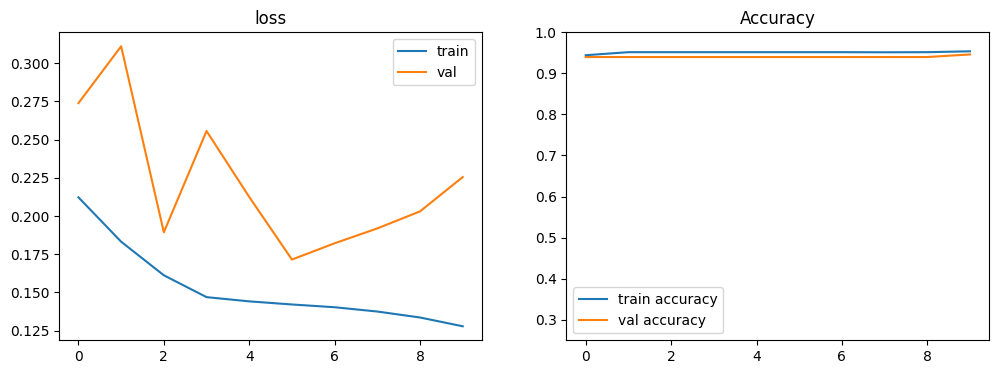

In [48]:
plot_history(history3)
plt.savefig('Zdislav.jpg')

## In test 

In [56]:
df.artist_group.unique()

array(['train_only', 'train_and_test'], dtype=object)

In [57]:
df[df.artist_group=='test_only']

Empty DataFrame
Columns: [artist, date, genre, pixelsx, pixelsy, size_bytes, source, style, title, artist_group, in_train, new_filename, impath]
Index: []

In [58]:
df_famous

artist  date               genre  pixelsx  pixelsy  \
14         Ivan Aivazovsky  1873              marina   7444.0   5811.0   
28            Gustave Dore  1866  religious painting   4915.0   6068.0   
82         Ivan Aivazovsky  1850              marina   5815.0   3840.0   
112              Rembrandt   NaN            portrait   4032.0   5008.0   
147            Edgar Degas  1869            interior   5382.0   3349.0   
...                    ...   ...                 ...      ...      ...   
101111  Pyotr Konchalovsky  1928     flower painting    375.0    450.0   
101112  Pyotr Konchalovsky  1928           cityscape    450.0    375.0   
101114  Pyotr Konchalovsky  1932          still life    450.0    375.0   
101176  Pyotr Konchalovsky  1908            portrait    374.0    450.0   
101180  Pyotr Konchalovsky  1923            portrait    450.0    374.0   

        size_bytes   source               style  \
14       3189597.0  wikiart         Romanticism   
28      29811319.0  wikiart         Romanticism   
82      16019462.0  wikiart         Romanticism   
112      1384905.0  wikiart             Baroque   
147      1824204.0  wikiart       Impressionism   
...            ...      ...                 ...   
101111     42300.0  wikiart  Post-Impressionism   
101112     36427.0  wikiart  Post-Impressionism   
101114     51658.0  wikiart             Realism   
101176     50917.0  wikiart  Post-Impressionism   
101180     43756.0  wikiart             Realism   

                                                    title    artist_group  \
14                                           Storm at sea  train_and_test   
28                                       Death of Eleazer  train_and_test   
82                                         The Ninth Wave  train_and_test   
112                                   Lady with a Lap Dog  train_and_test   
147                                   Interior (The Rape)  train_and_test   
...                                                   ...             ...   
101111                               Still Life. Orchids.  train_and_test   
101112                             Novgorod. Kukui Tower.  train_and_test   
101114             Still Life with a fly. Every victuals.  train_and_test   
101176  Paris. The boy with the apple. (Portrait of Mi...  train_and_test   
101180        The night watchman with a dog (Ivan Payala)  train_and_test   

        in_train new_filename                   impath  \
14          True    99442.jpg   ./data/train/99442.jpg   
28          True     7486.jpg    ./data/train/7486.jpg   
82          True    81750.jpg   ./data/train/81750.jpg   
112         True    40672.jpg   ./data/train/40672.jpg   
147         True    95360.jpg   ./data/train/95360.jpg   
...          ...          ...                      ...   
101111      True    84241.jpg   ./data/train/84241.jpg   
101112      True    41406.jpg   ./data/train/41406.jpg   
101114      True    13943.jpg   ./data/train/13943.jpg   
101176      True   101511.jpg  ./data/train/101511.jpg   
101180      True    48670.jpg   ./data/train/48670.jpg   

                                                    image  image_shape  \
14      [[[139, 138, 134], [137, 137, 134], [133, 133,...  (32, 32, 3)   
28      [[[232, 219, 204], [208, 196, 181], [204, 192,...  (32, 32, 3)   
82      [[[92, 84, 57], [92, 81, 56], [93, 81, 57], [9...  (32, 32, 3)   
112     [[[55, 57, 56], [55, 57, 56], [55, 56, 55], [5...  (32, 32, 3)   
147     [[[124, 114, 96], [124, 115, 101], [125, 113, ...  (32, 32, 3)   
...                                                   ...          ...   
101111  [[[118, 118, 115], [116, 118, 115], [131, 133,...  (32, 32, 3)   
101112  [[[133, 137, 125], [147, 147, 131], [150, 153,...  (32, 32, 3)   
101114  [[[93, 65, 51], [167, 122, 92], [77, 48, 45], ...  (32, 32, 3)   
101176  [[[131, 126, 113], [118, 112, 93], [119, 116, ...  (32, 32, 3)   
101180  [[[66, 79, 70], [77, 93, 76], [97, 107, 87], [...  (32, 32, 3)   

       

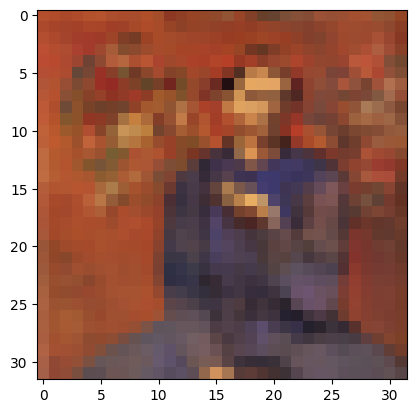

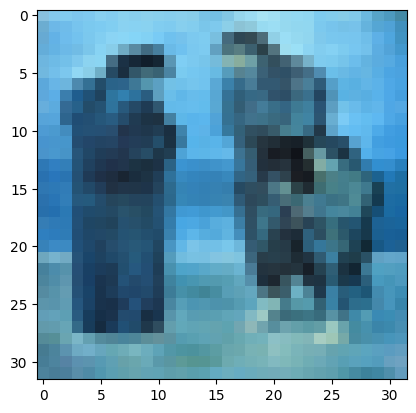

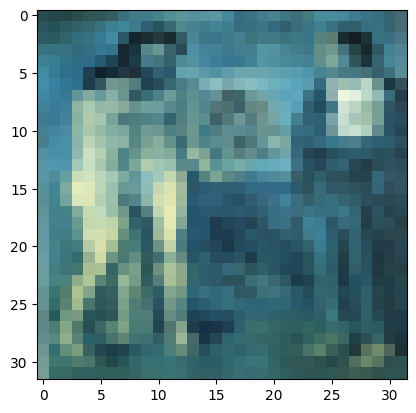

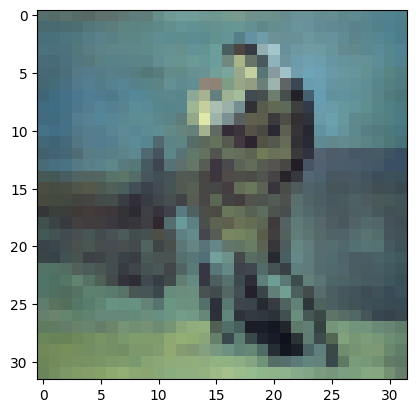

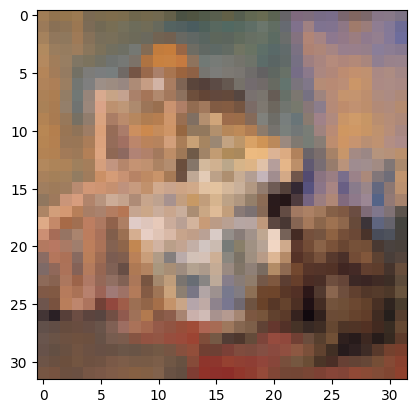

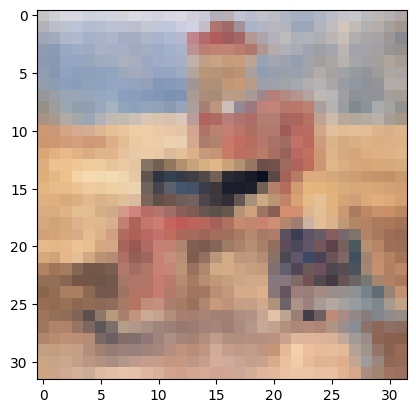

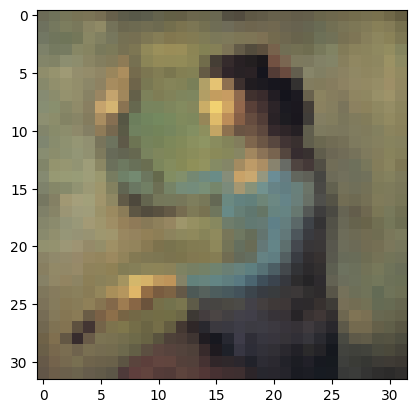

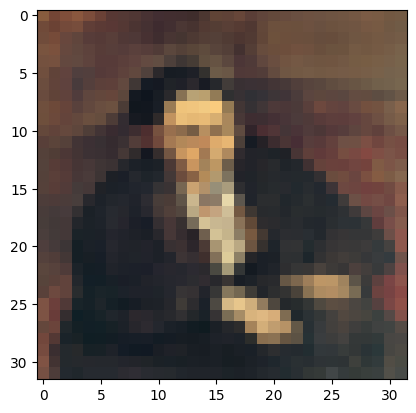

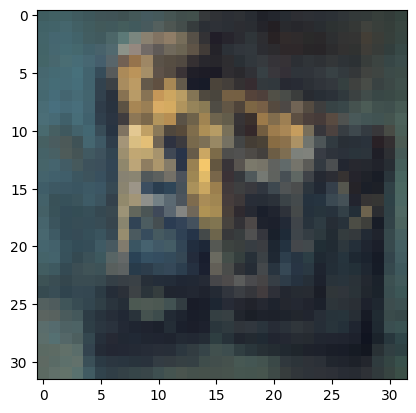

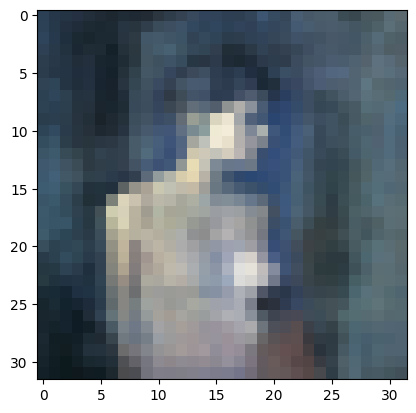

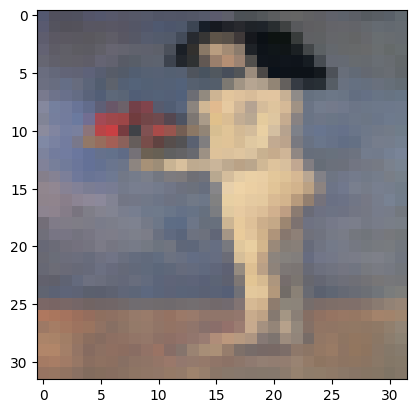

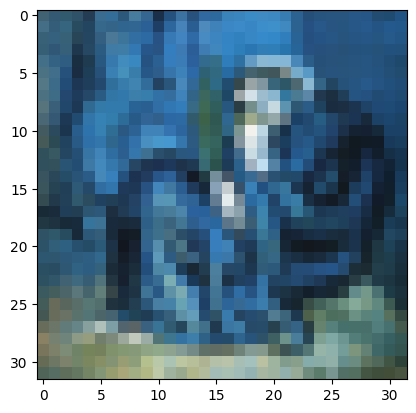

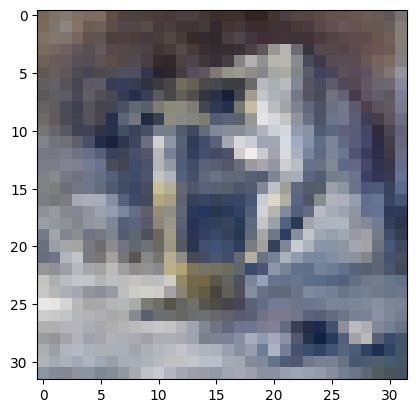

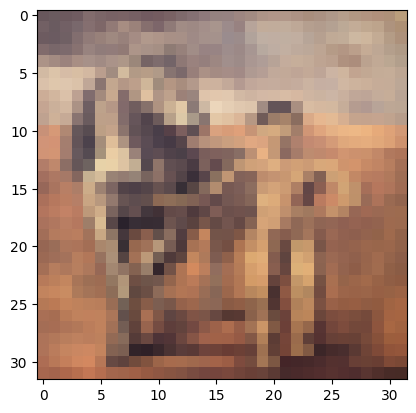

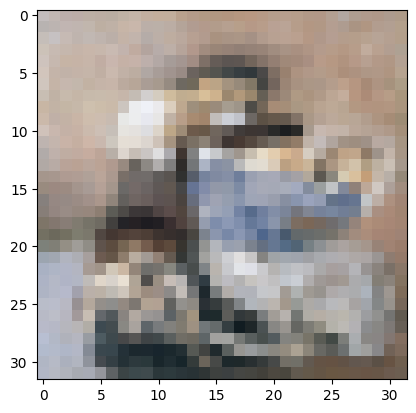

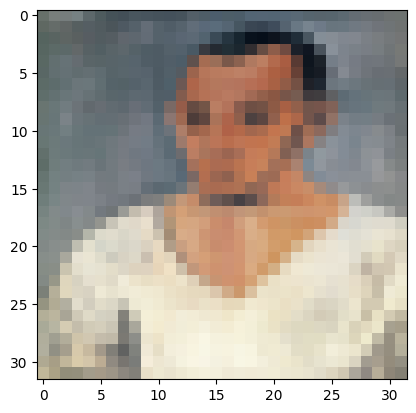

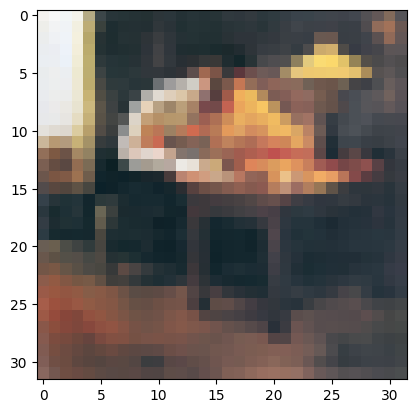

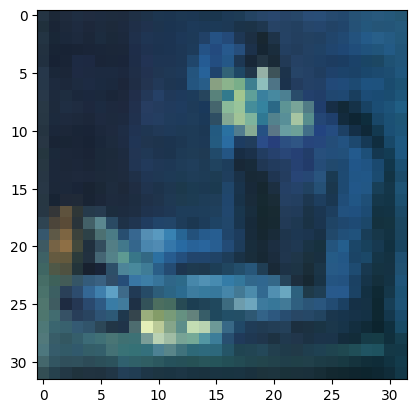

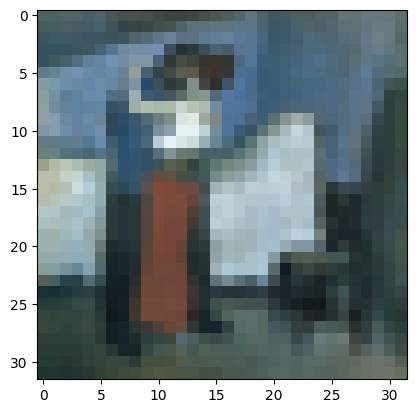

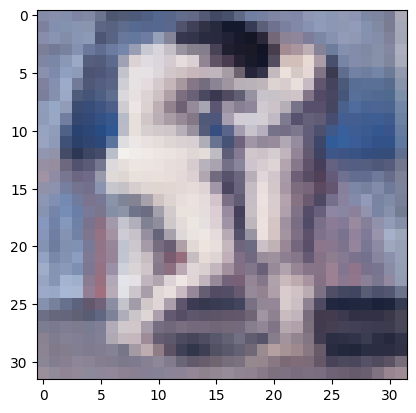

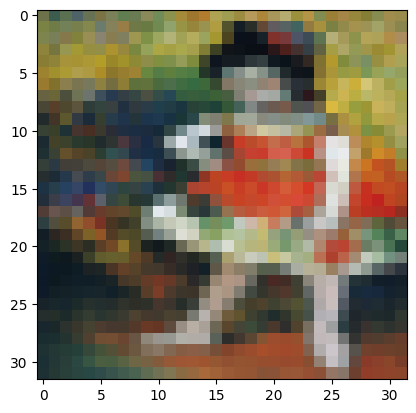

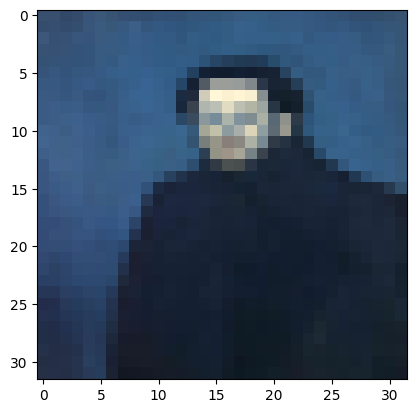

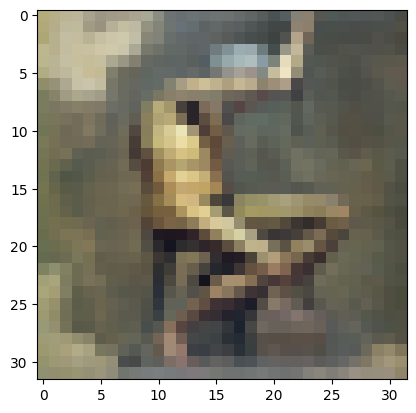

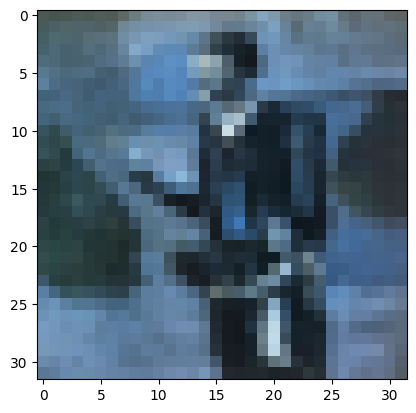

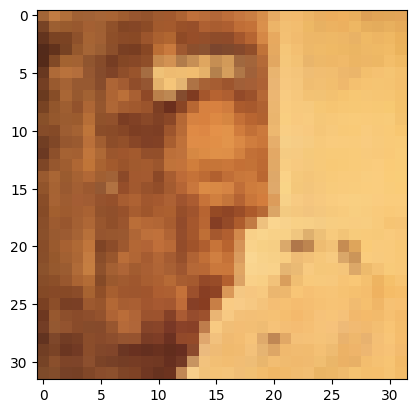

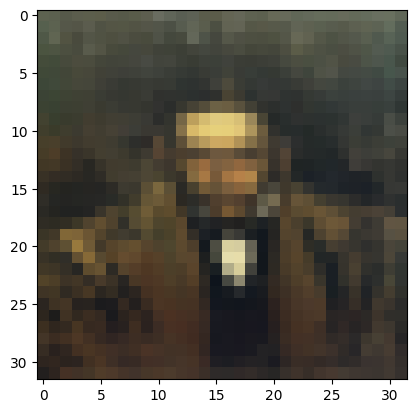

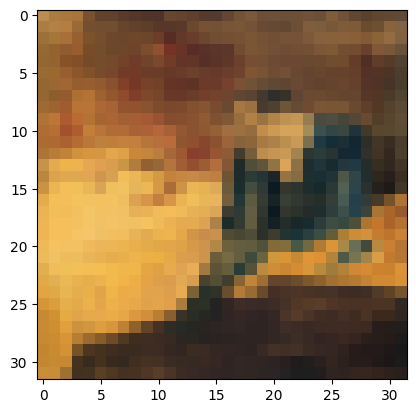

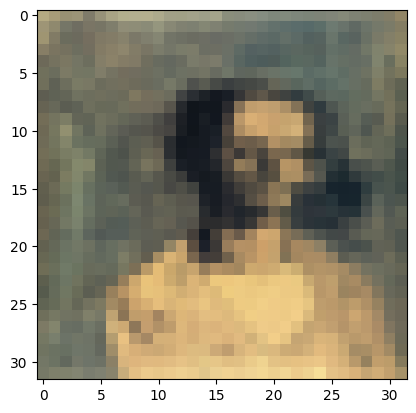

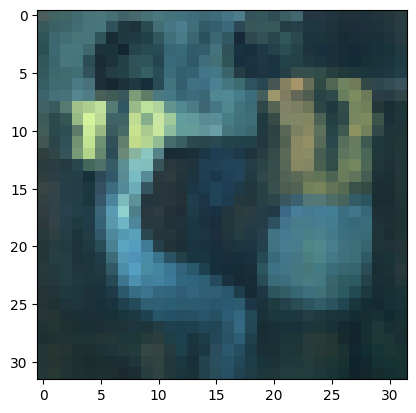

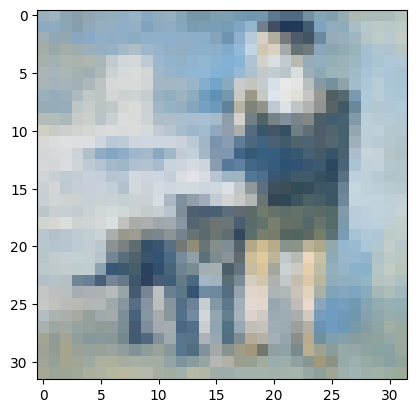

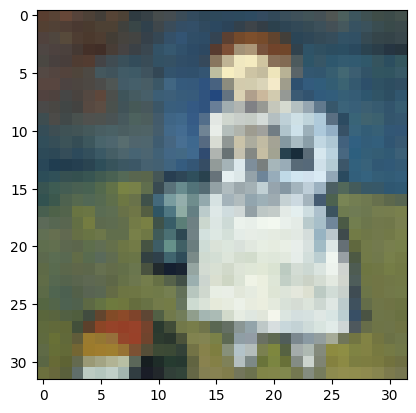

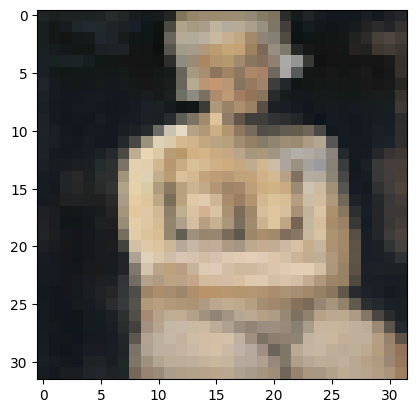

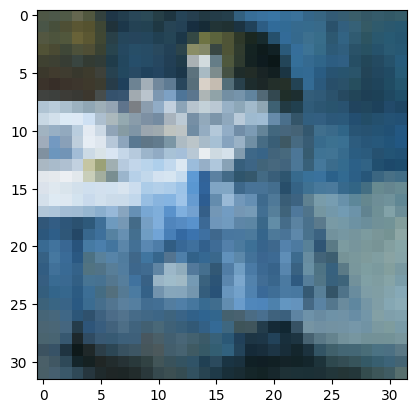

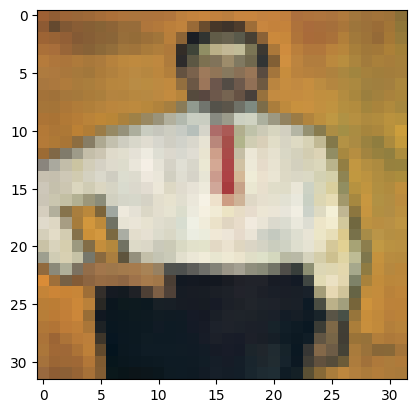

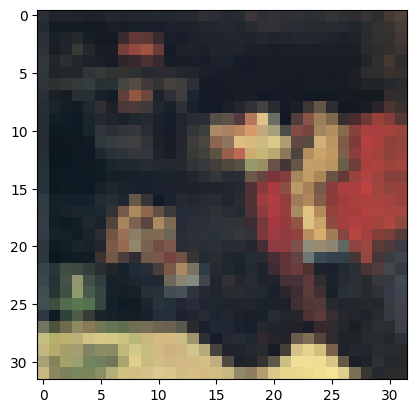

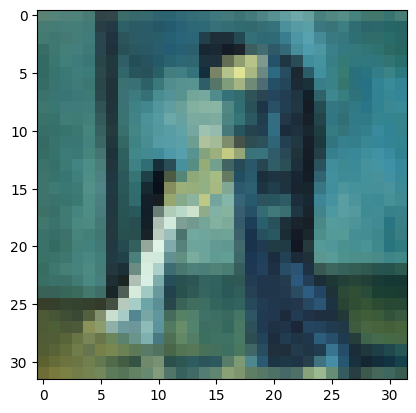

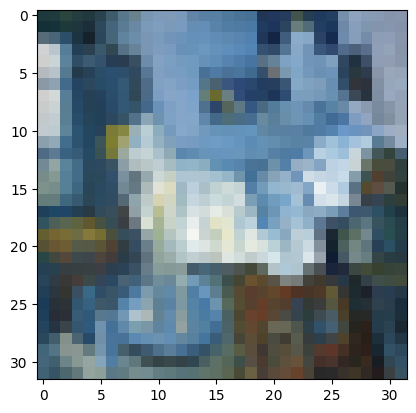

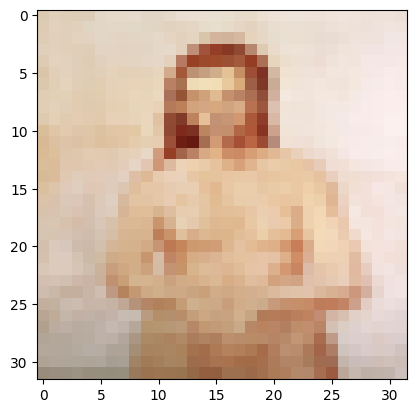

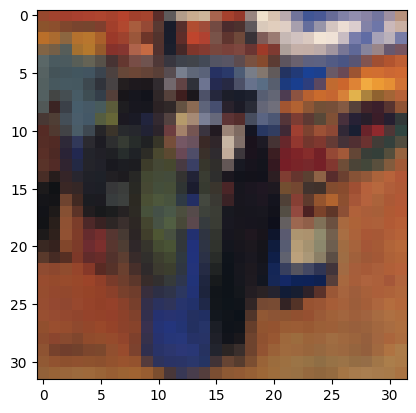

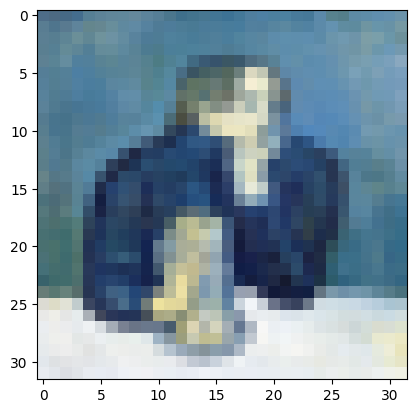

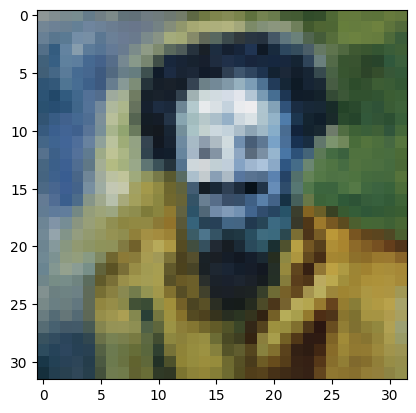

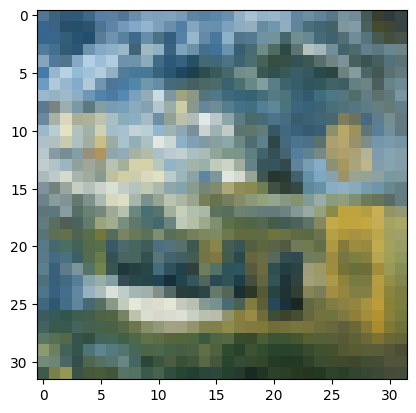

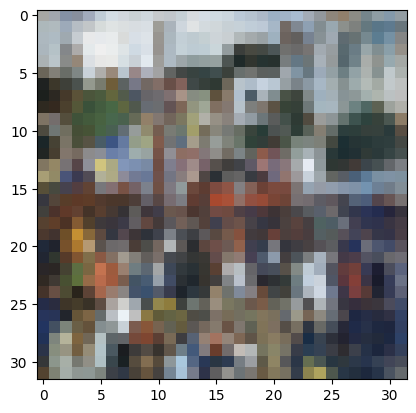

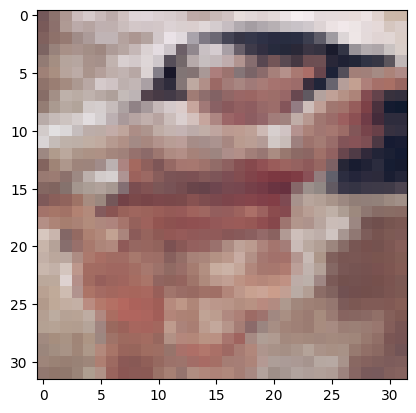

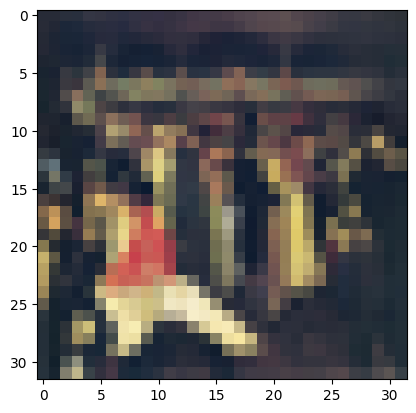

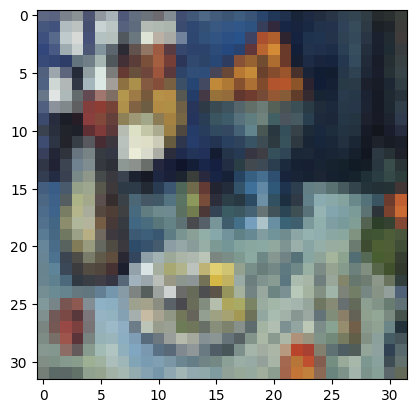

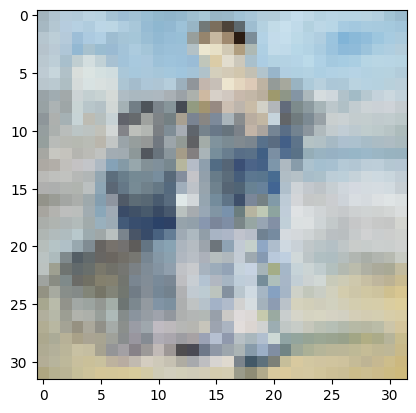

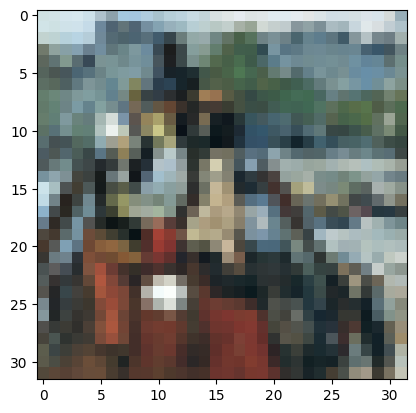

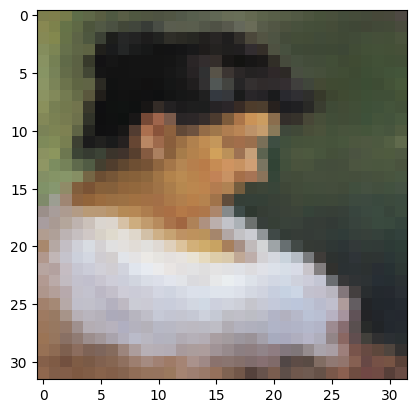

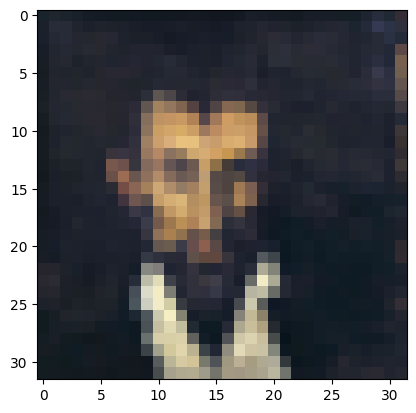

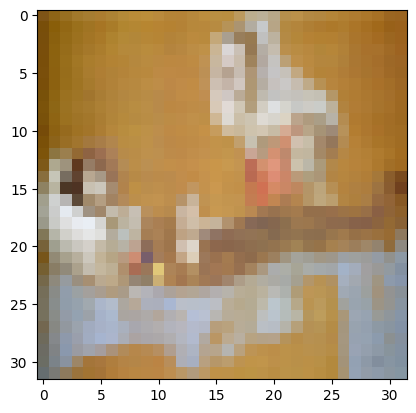

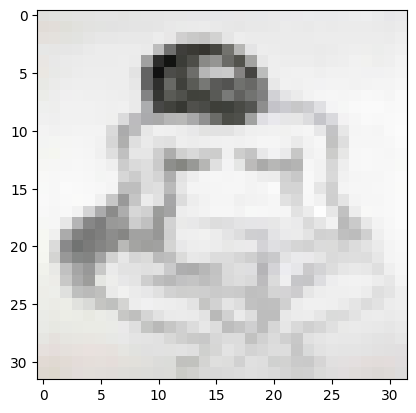

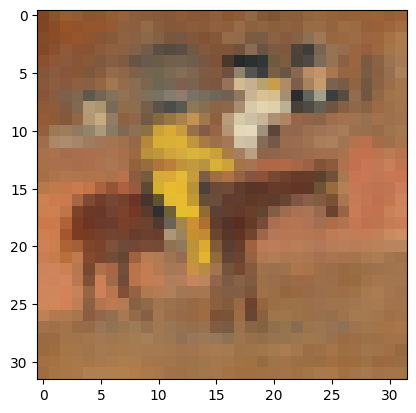

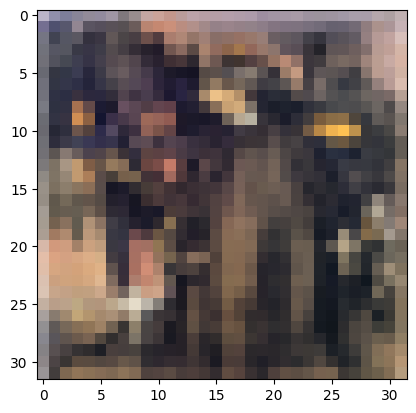

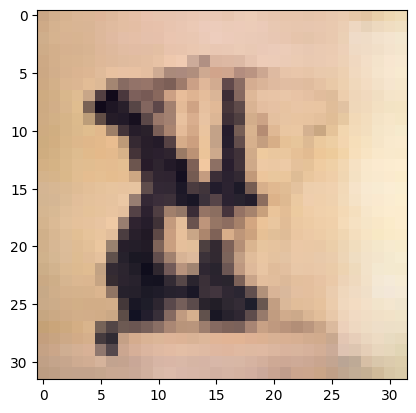

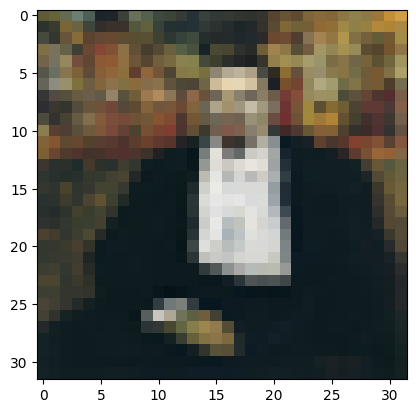

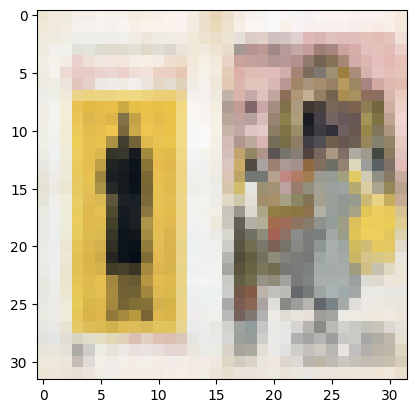

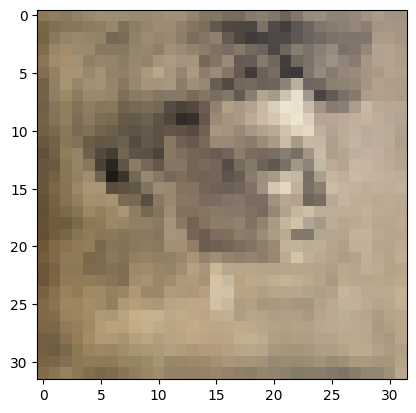

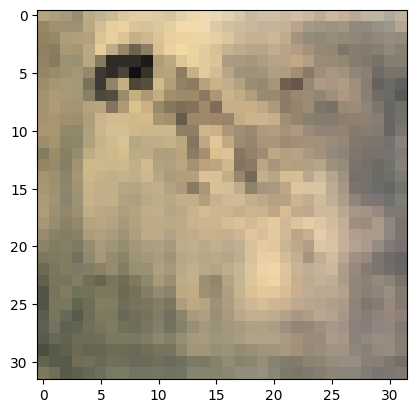

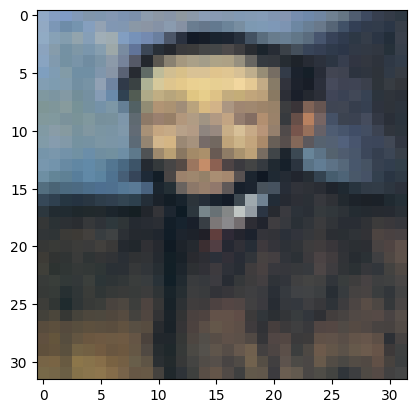

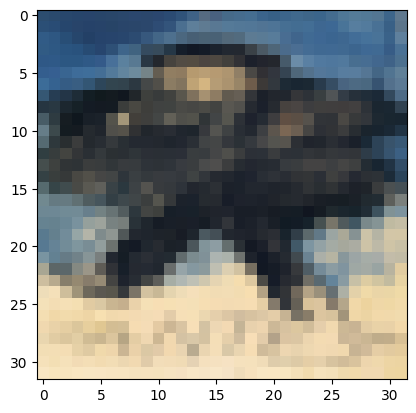

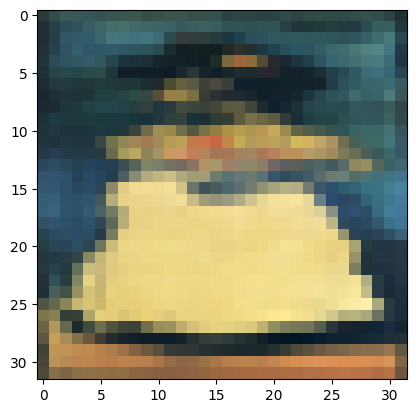

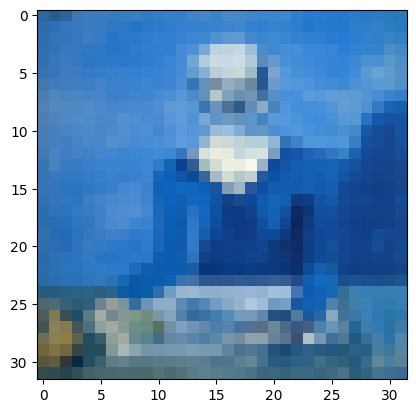

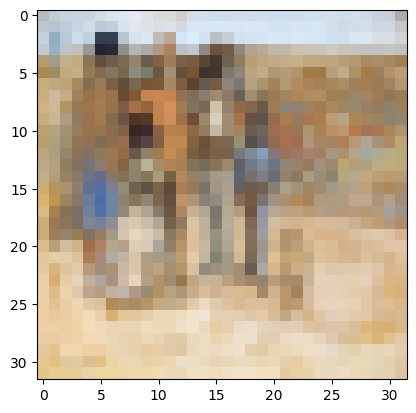

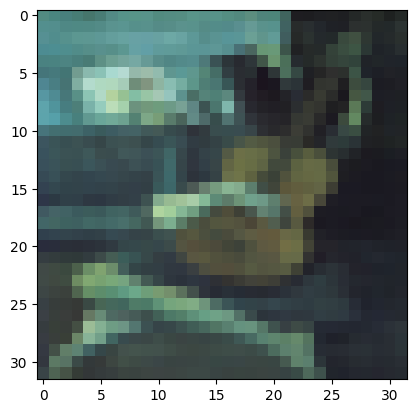

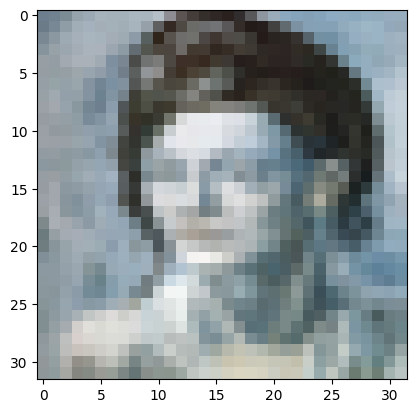

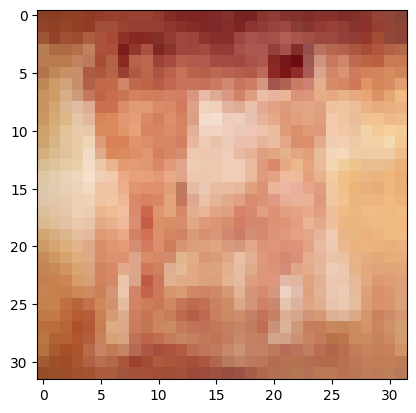

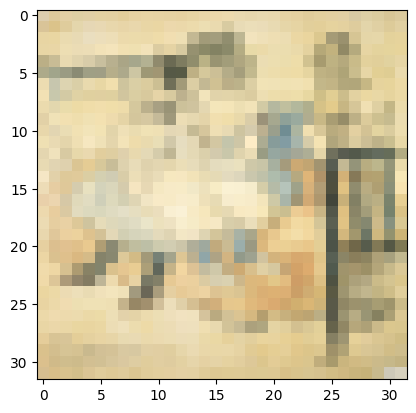

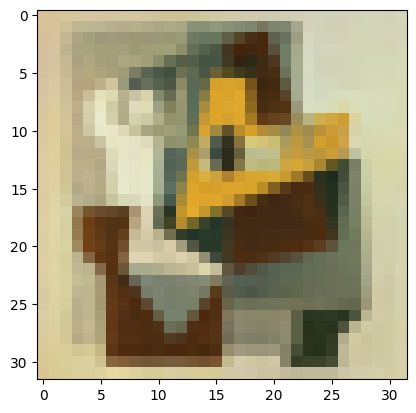

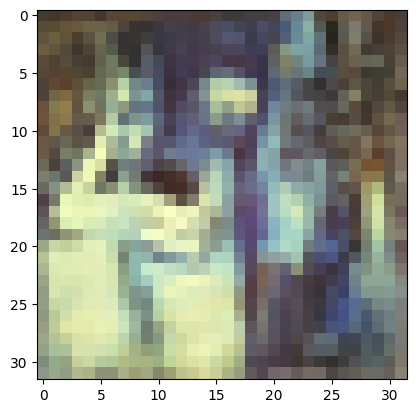

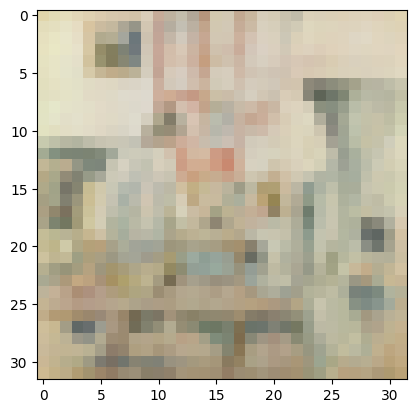

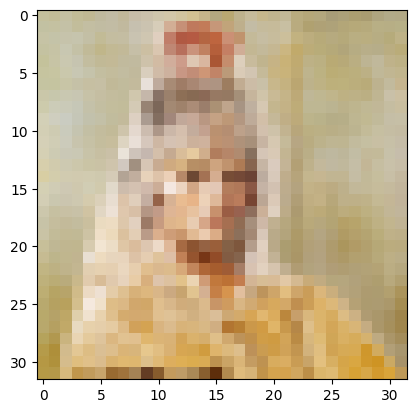

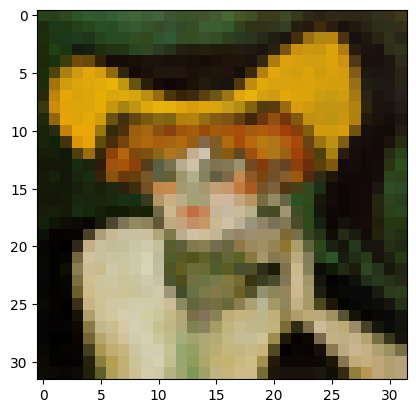

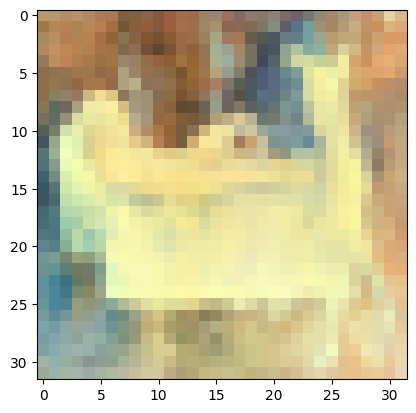

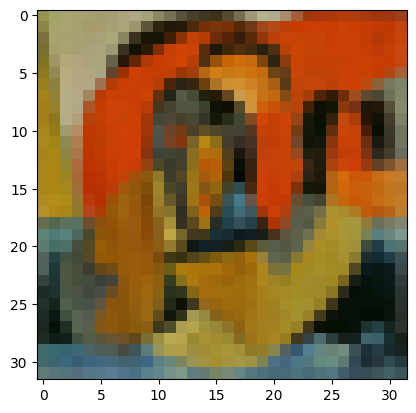

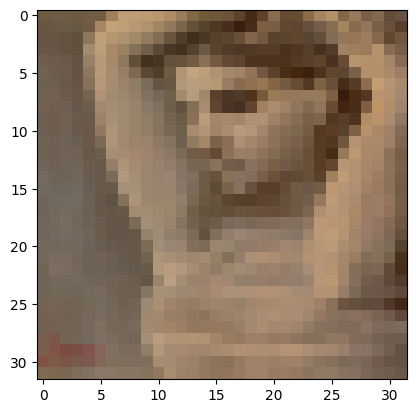

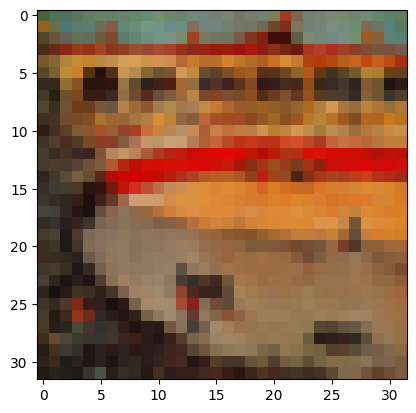

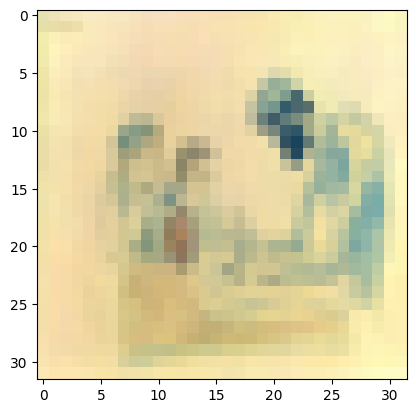

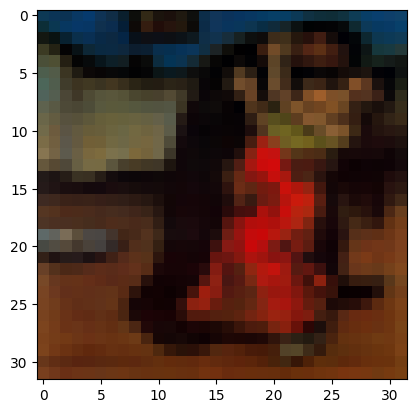

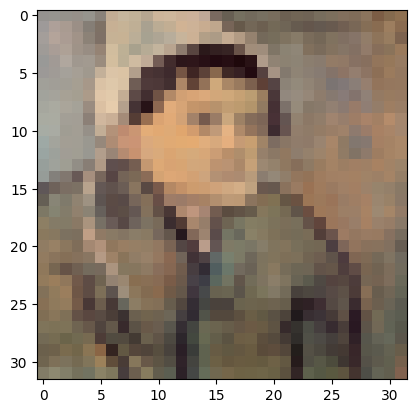

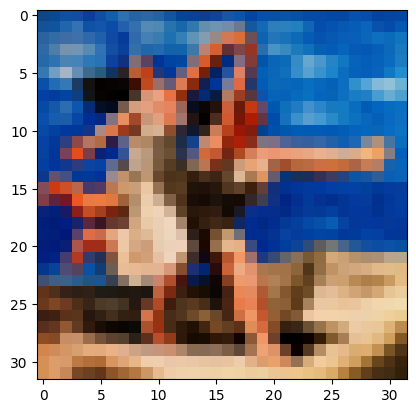

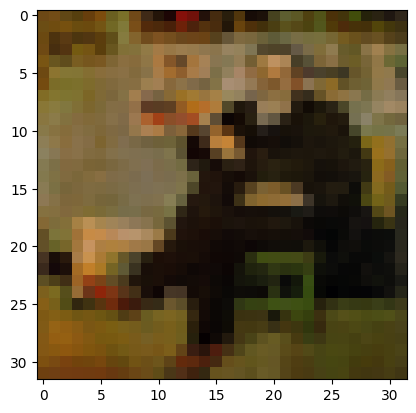

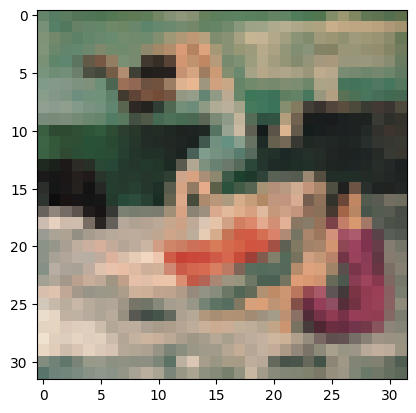

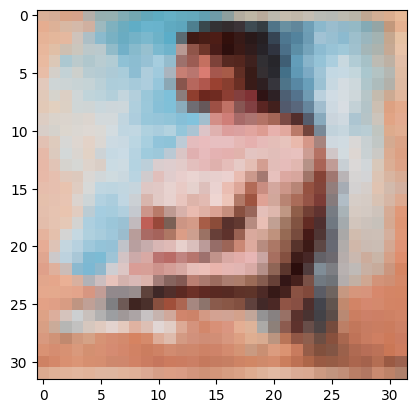

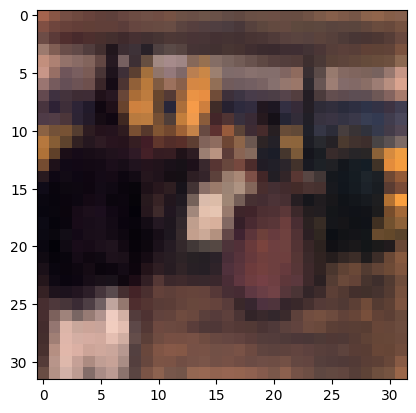

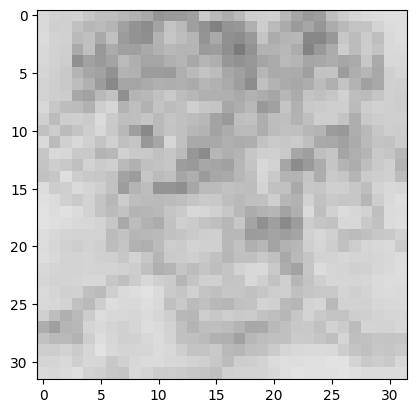

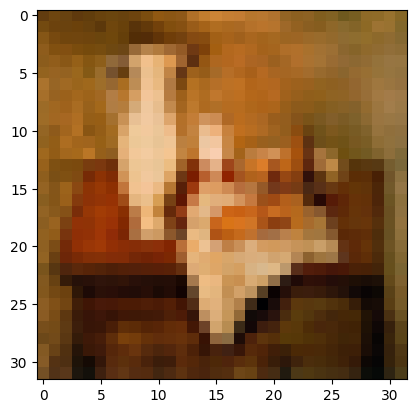

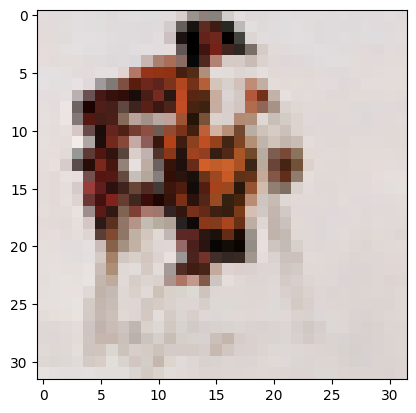

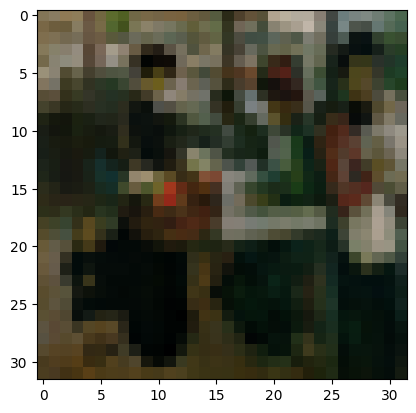

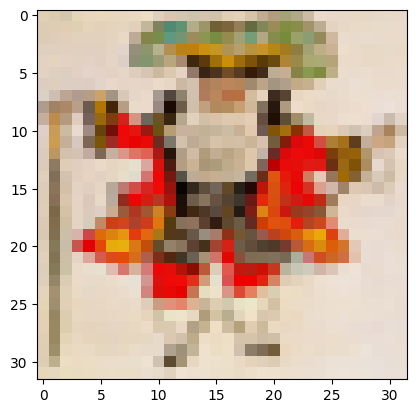

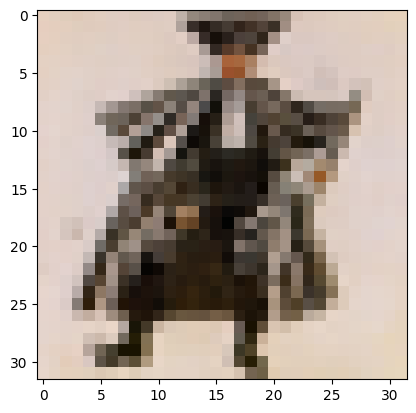

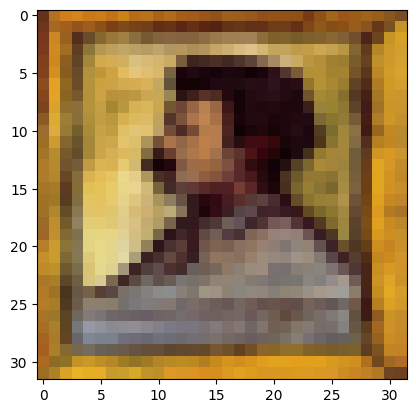

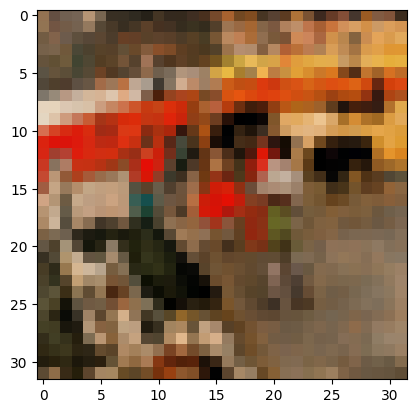

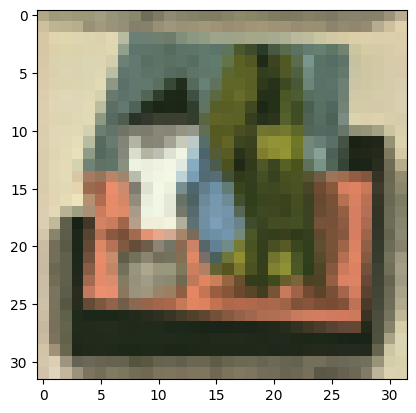

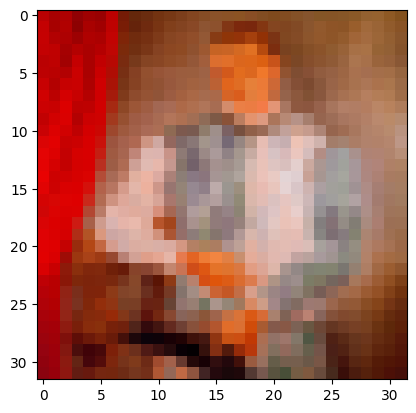

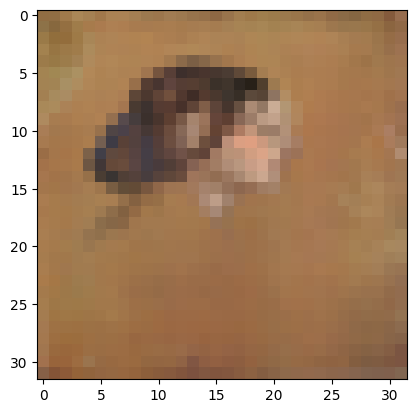

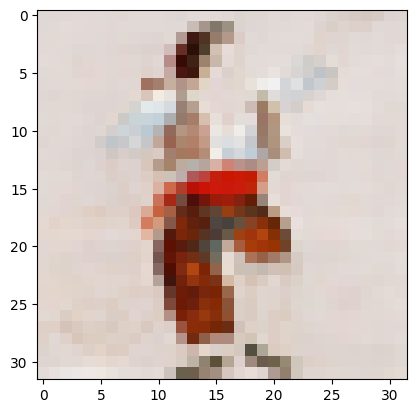

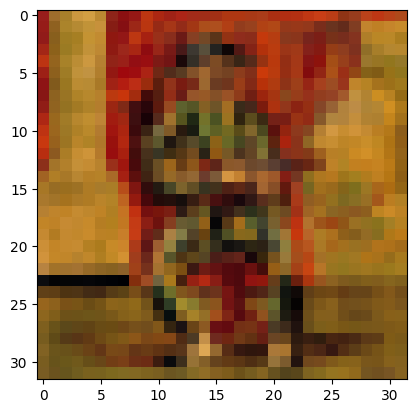

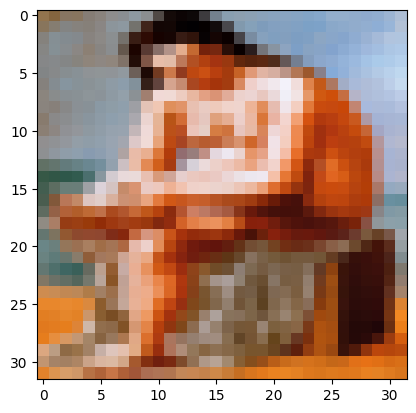

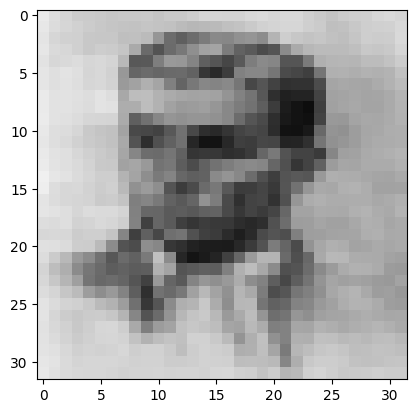

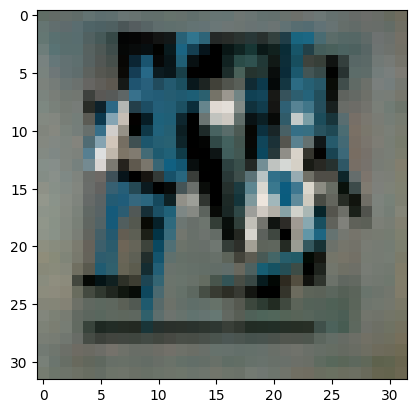

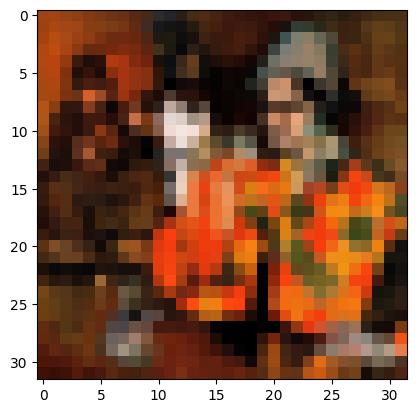

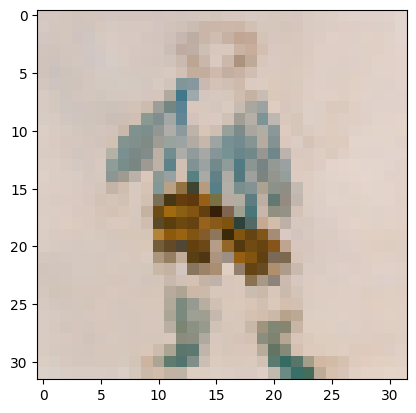

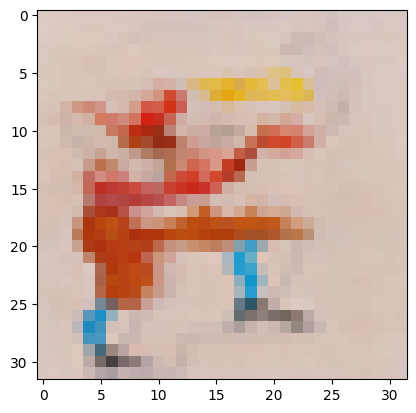

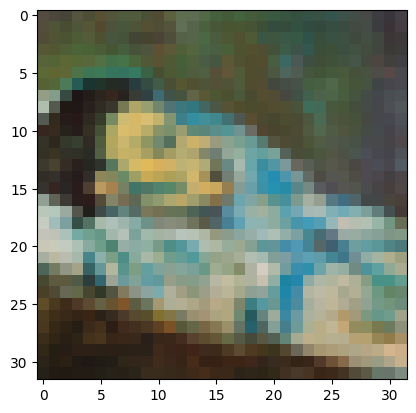

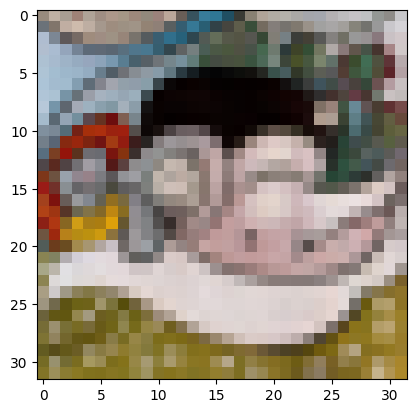

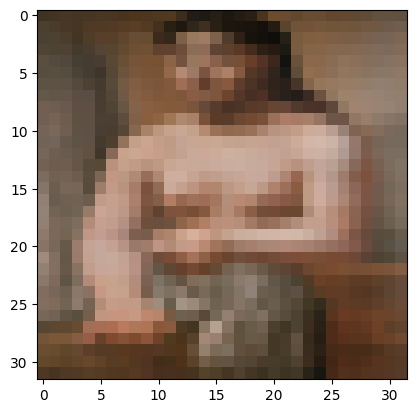

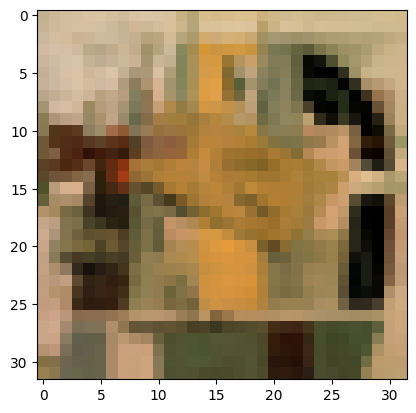

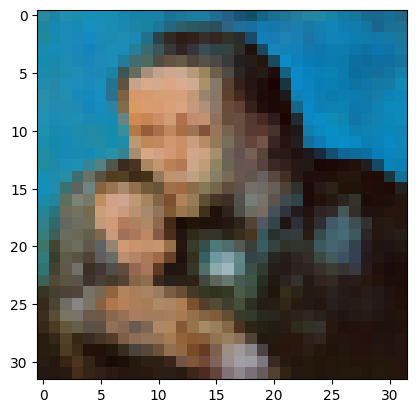

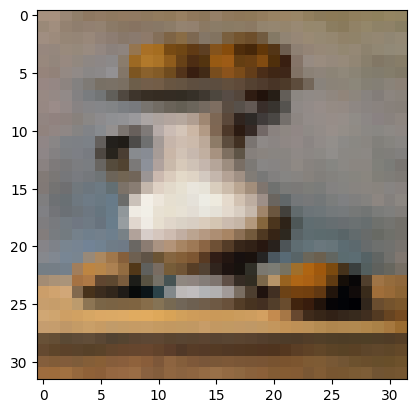

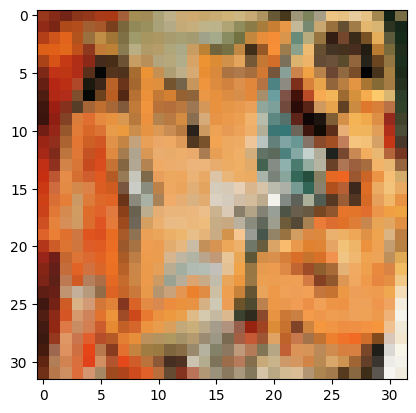

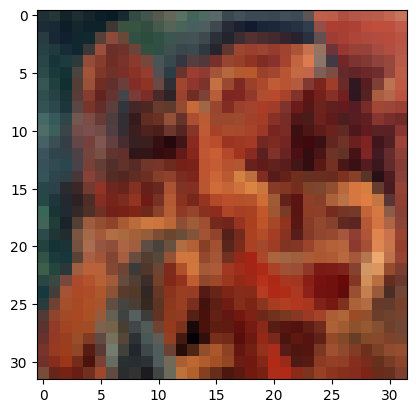

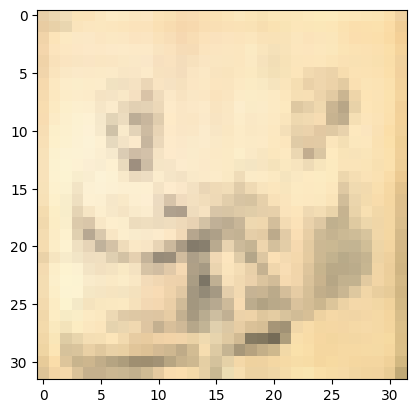

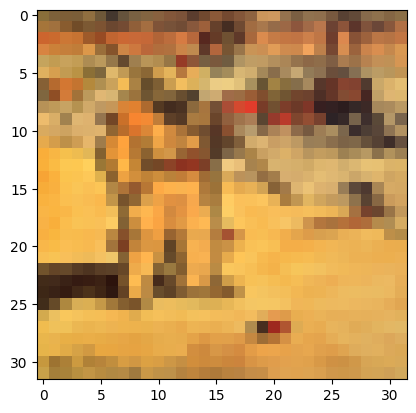

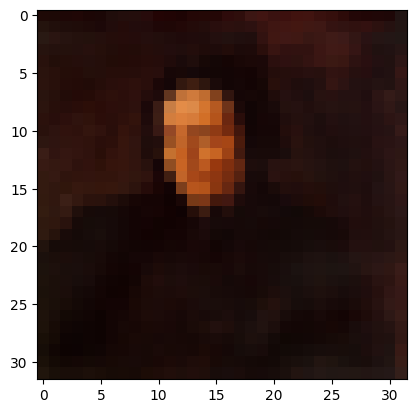

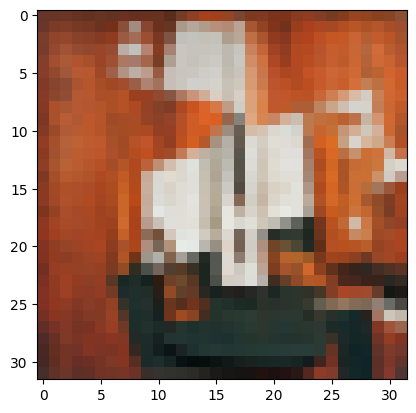

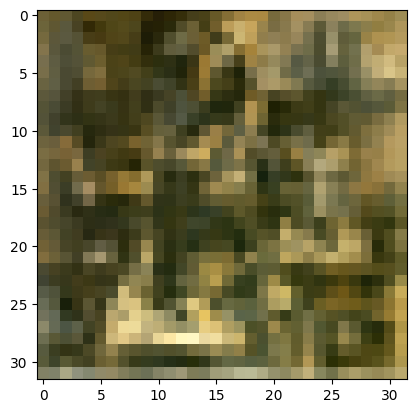

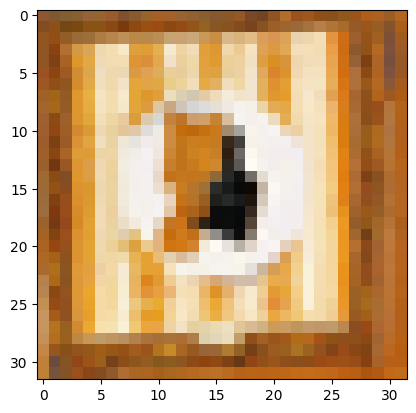

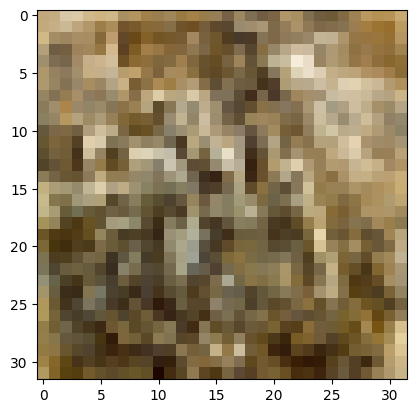

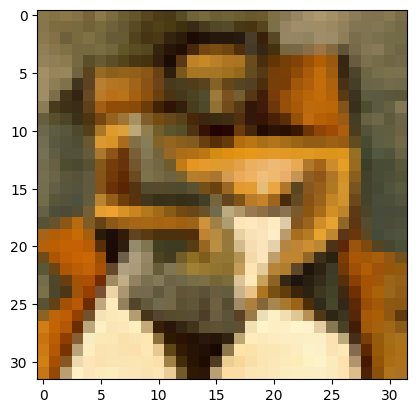

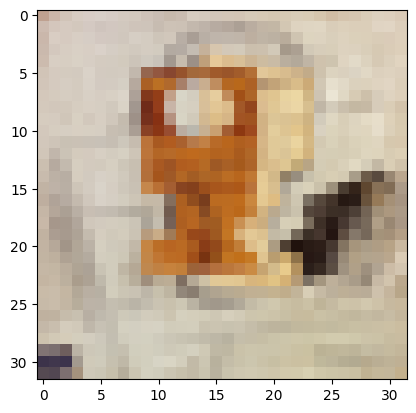

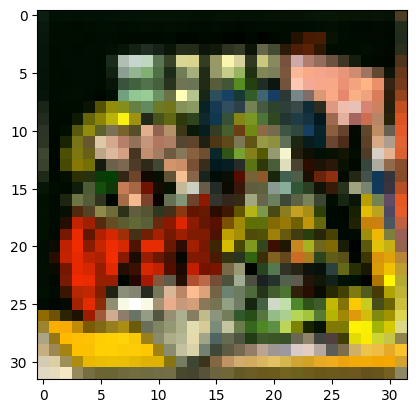

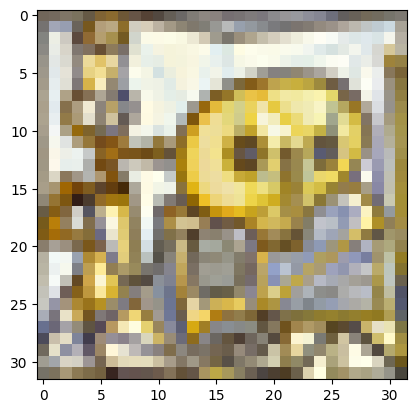

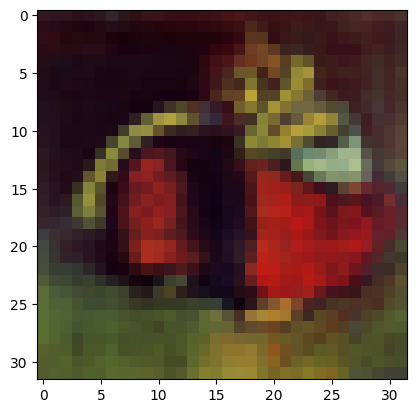

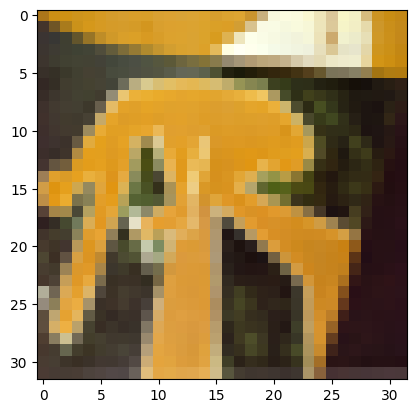

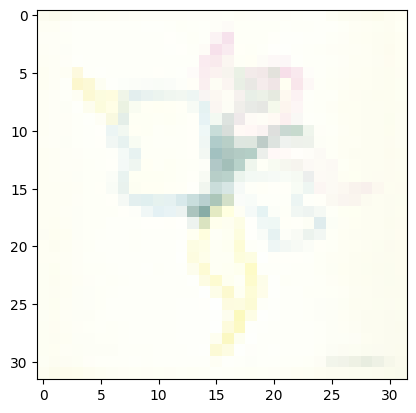

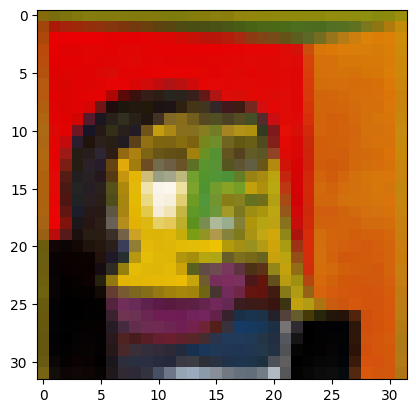

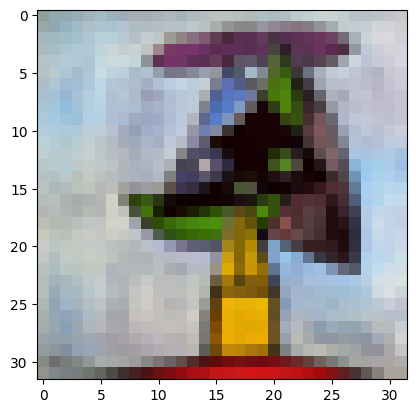

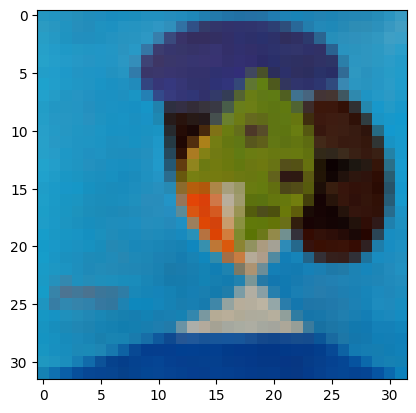

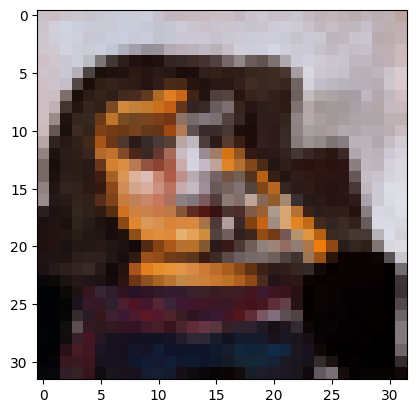

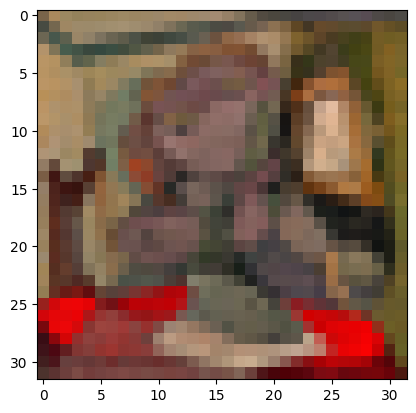

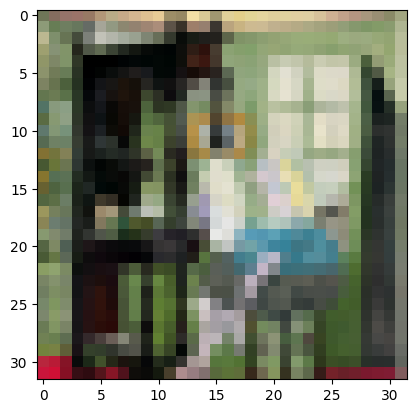

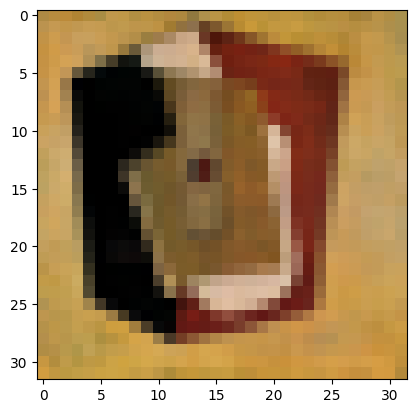

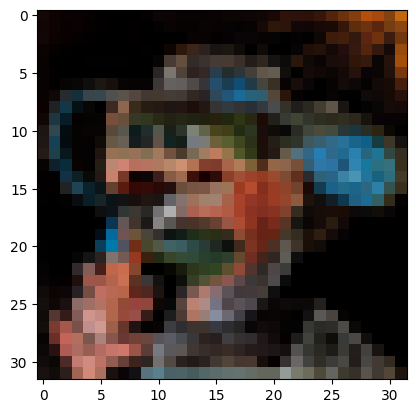

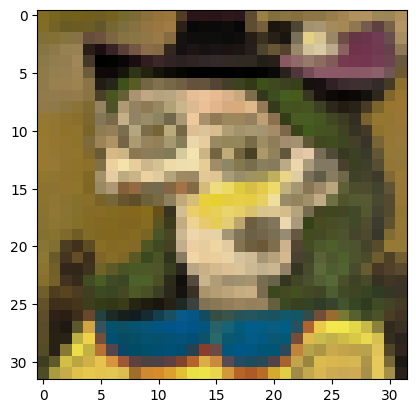

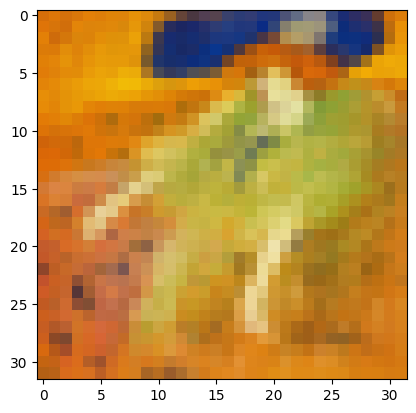

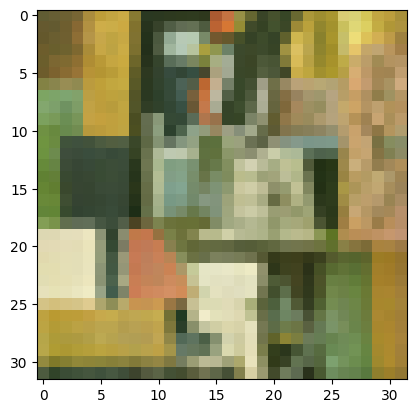

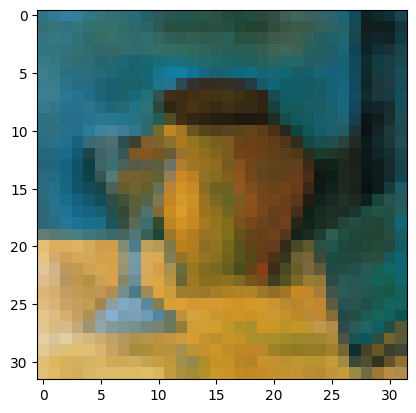

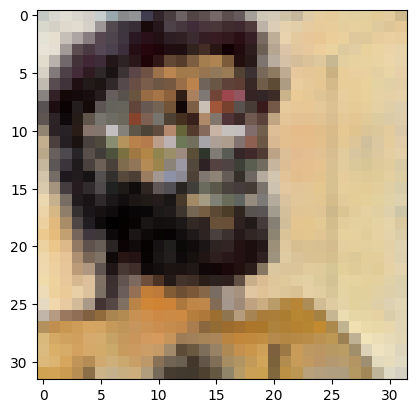

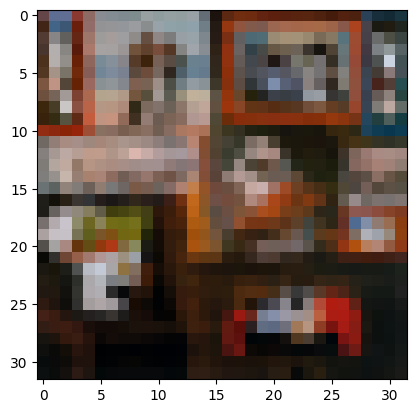

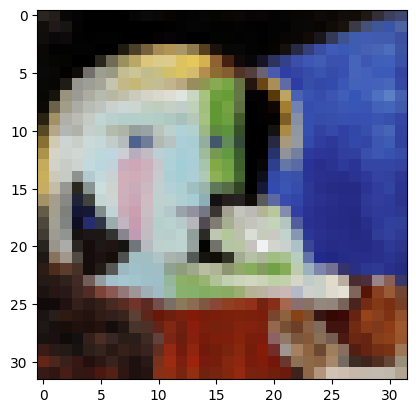

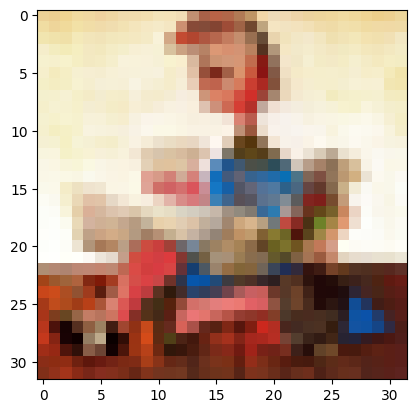

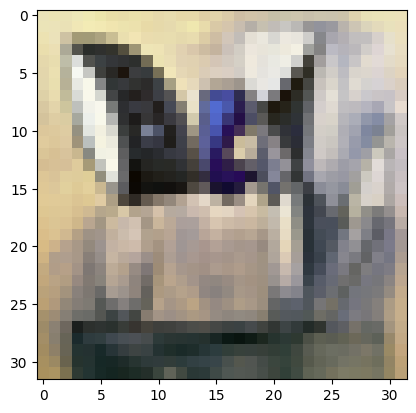

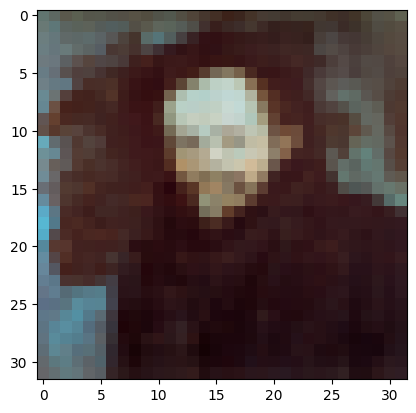

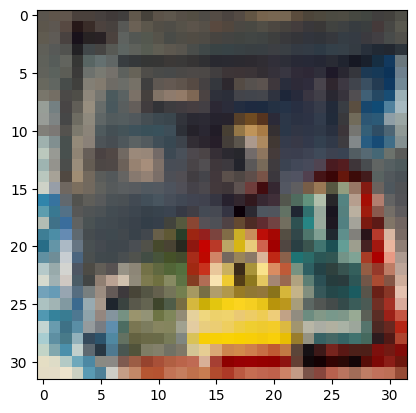

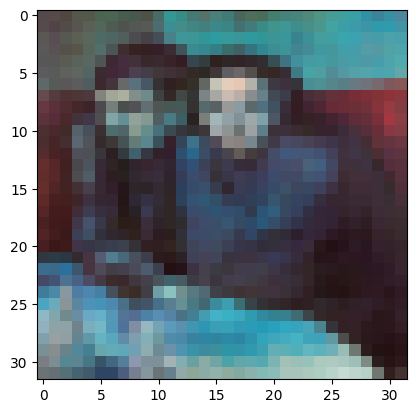

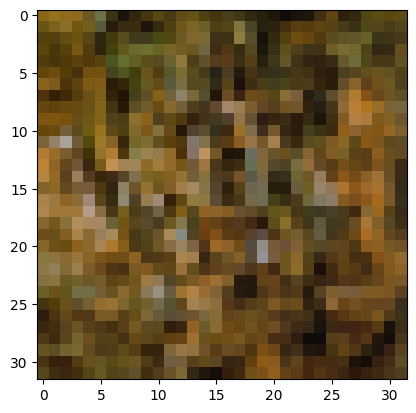

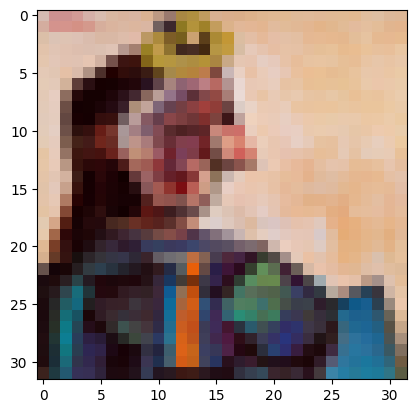

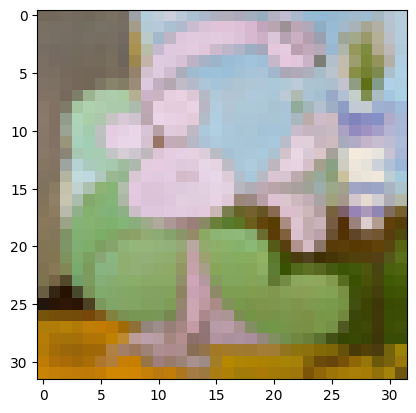

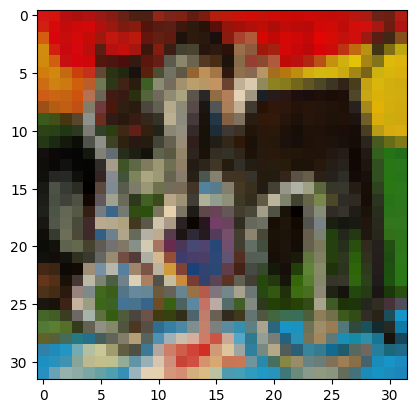

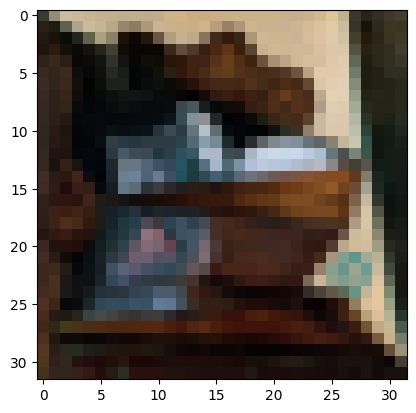

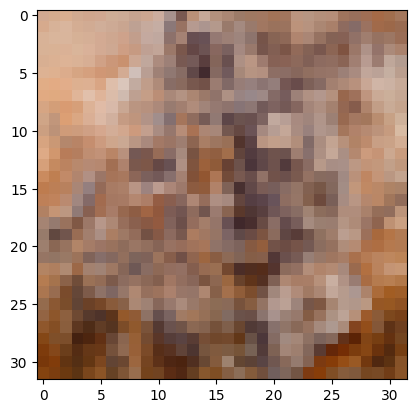

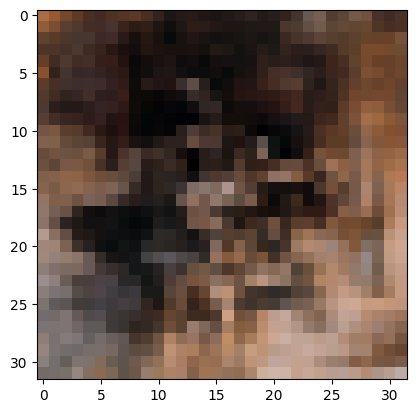

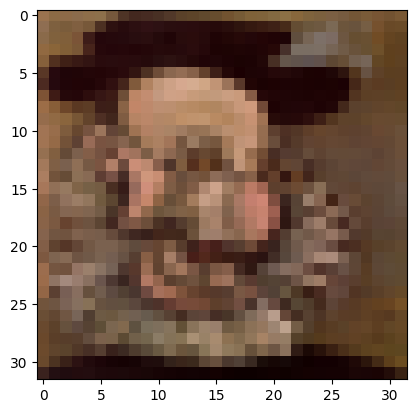

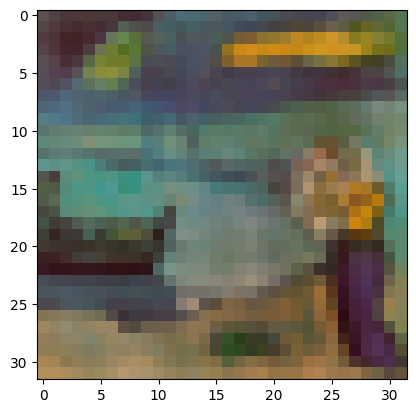

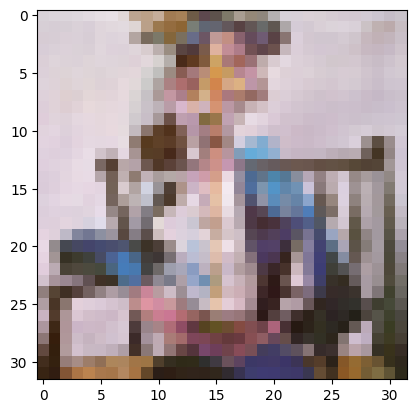

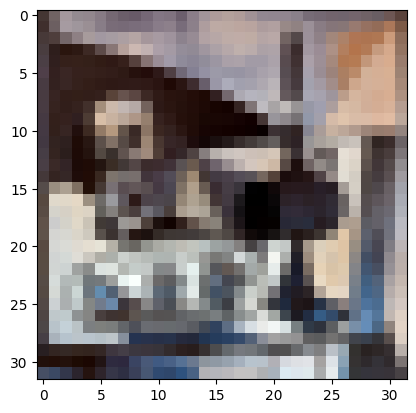

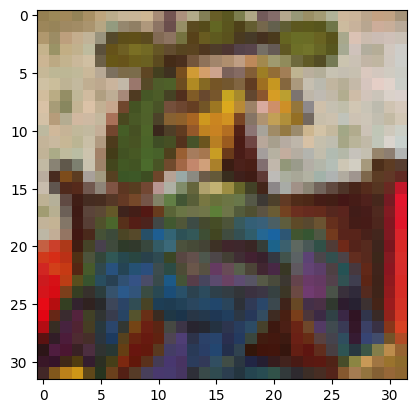

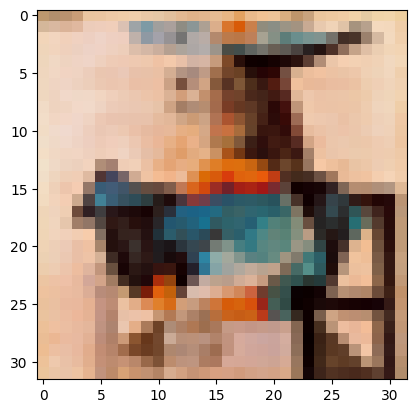

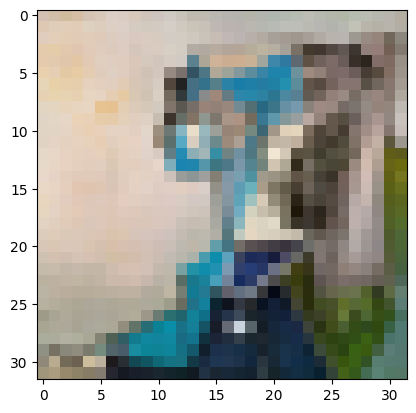

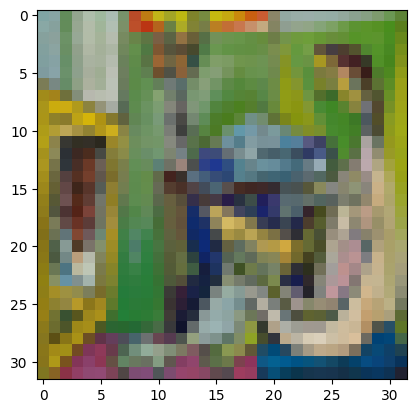

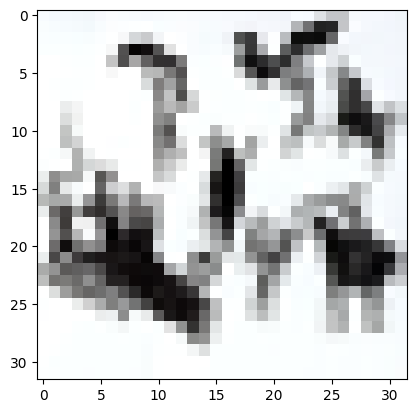

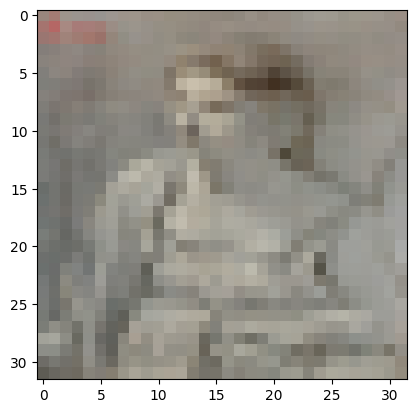

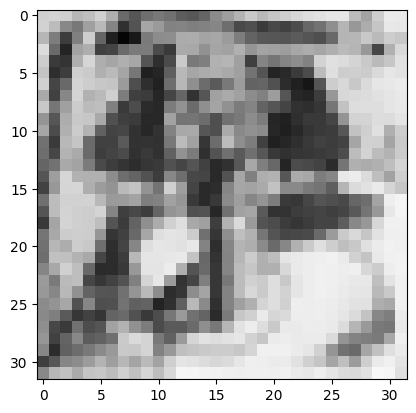

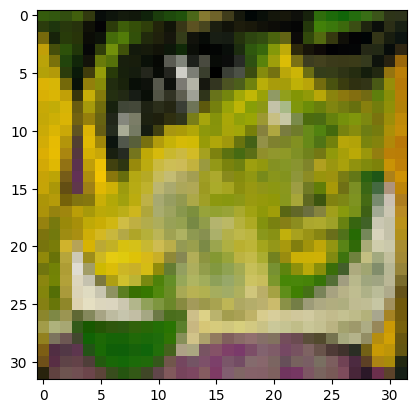

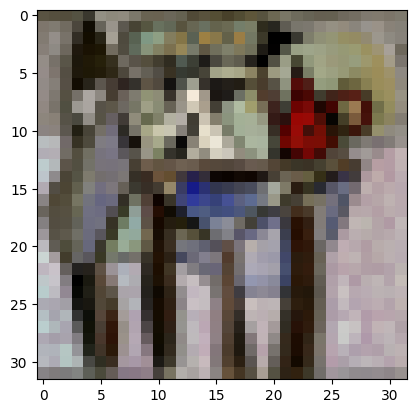

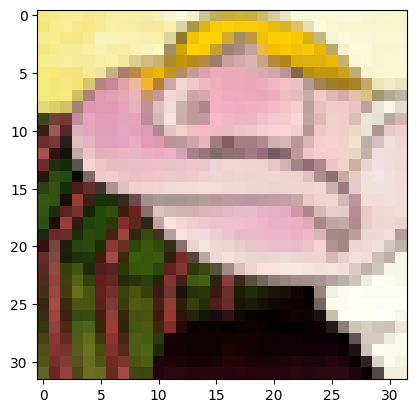

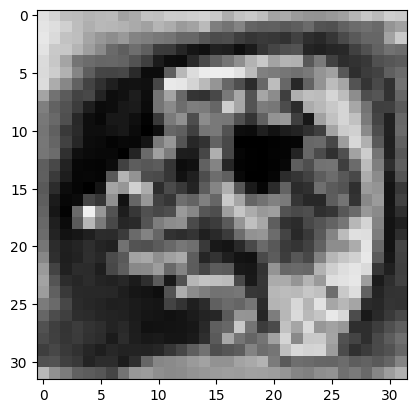

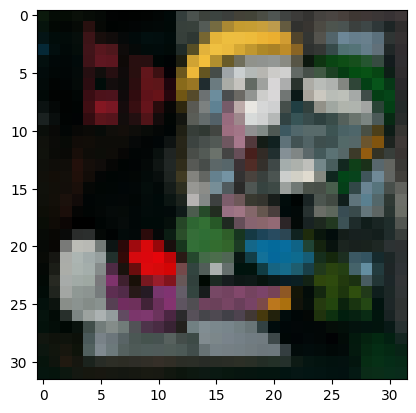

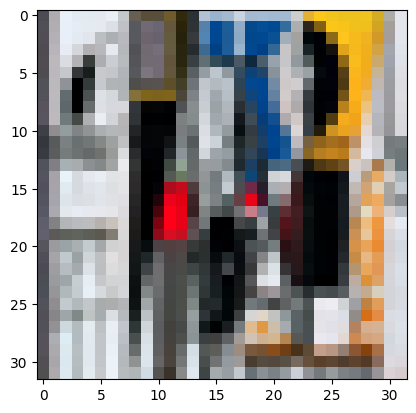

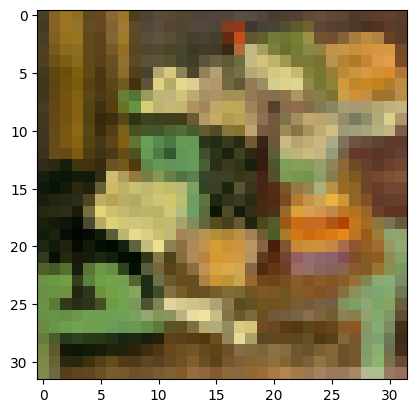

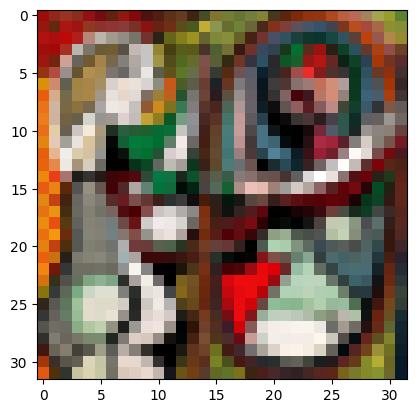

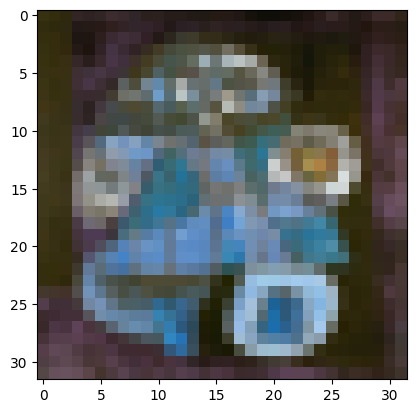

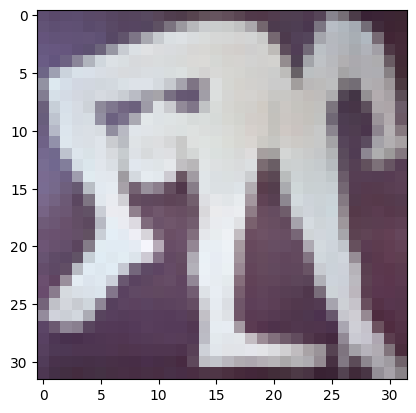

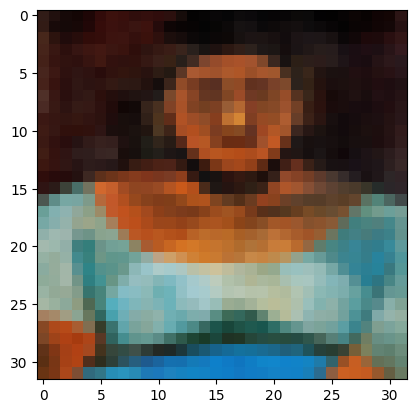

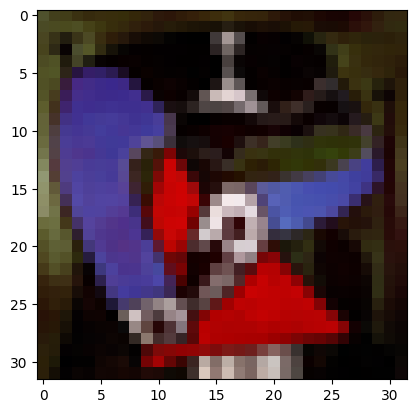

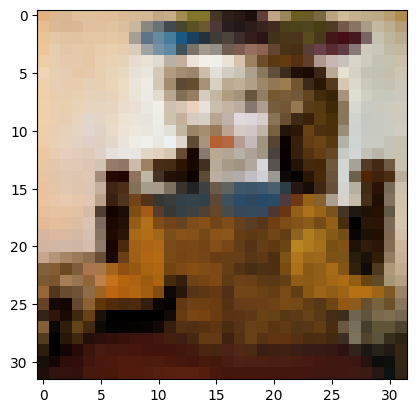

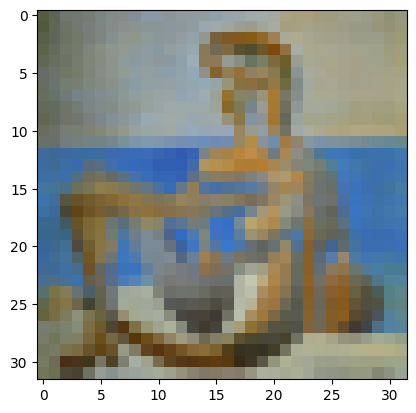

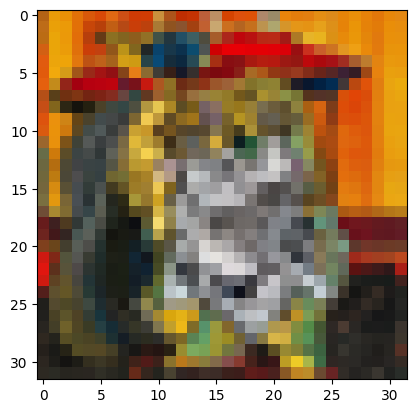

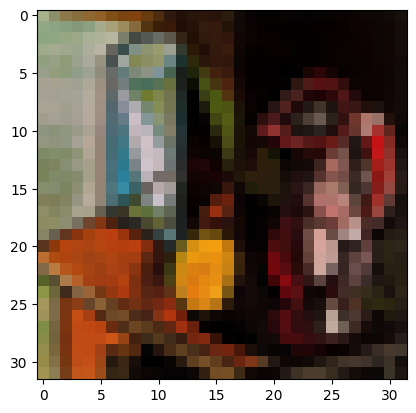

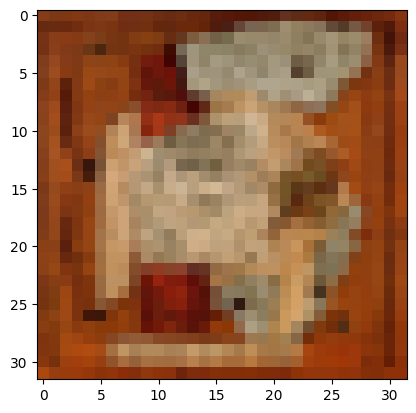

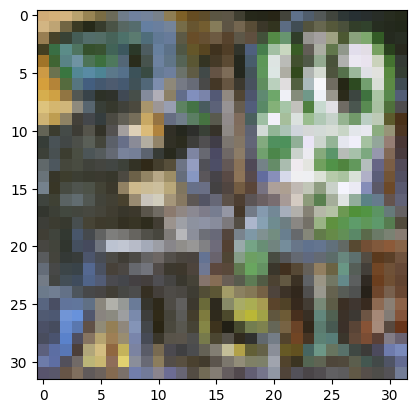

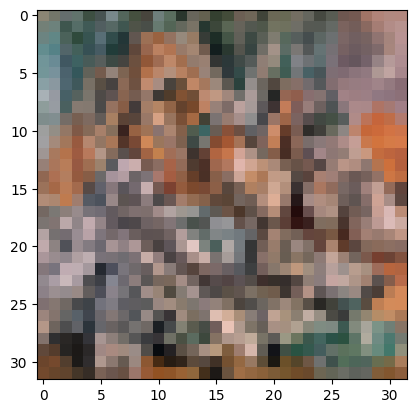

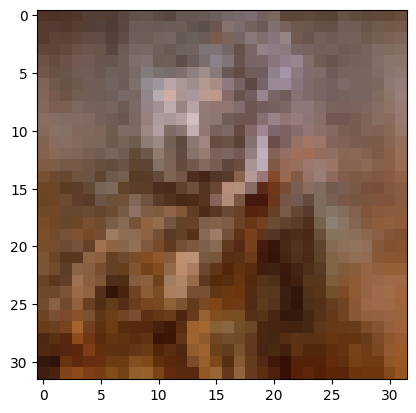

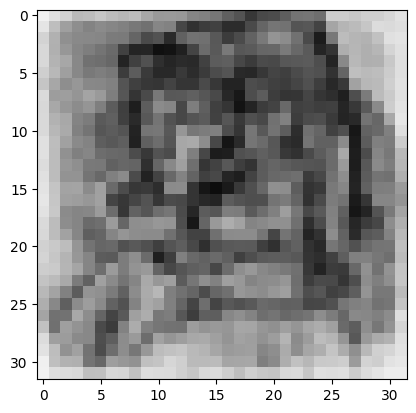

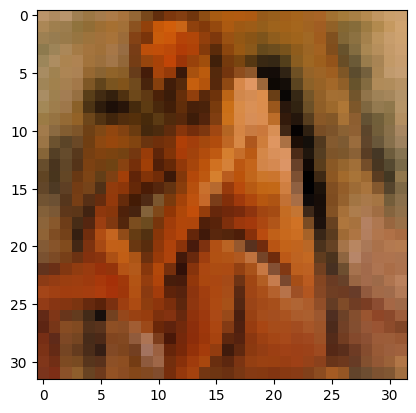

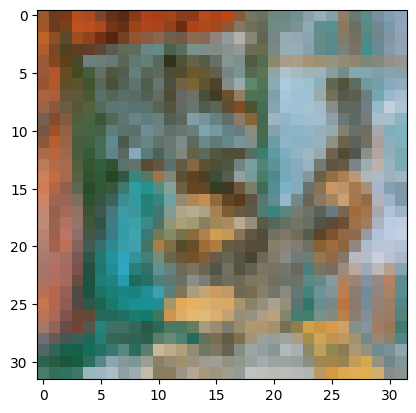

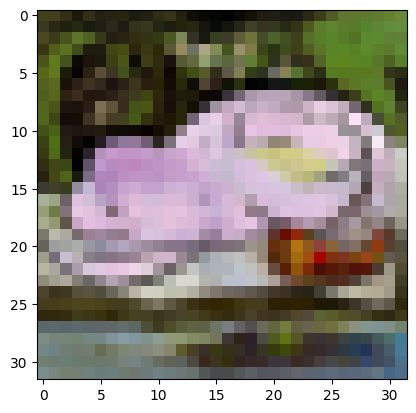

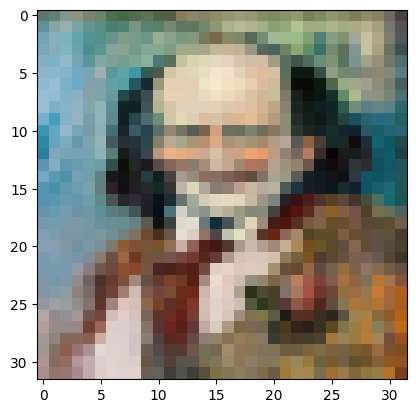

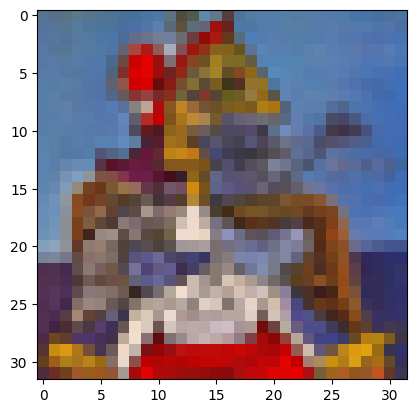

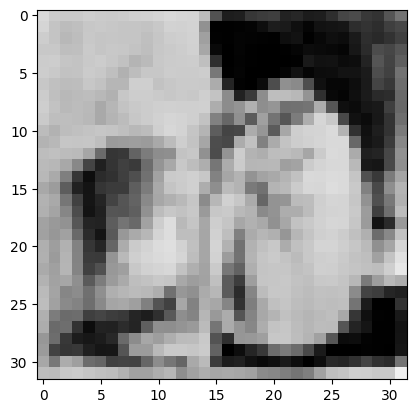

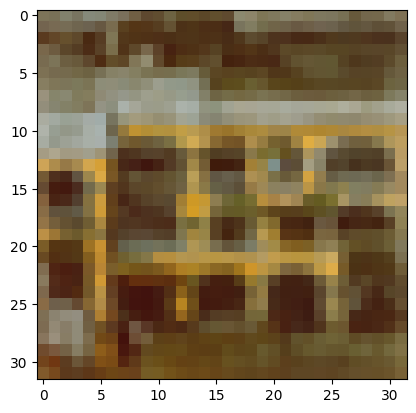

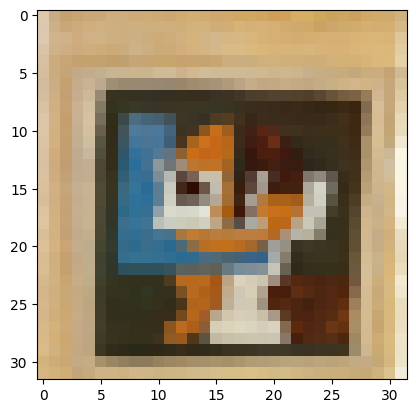

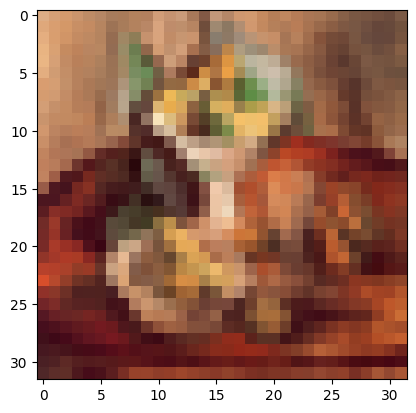

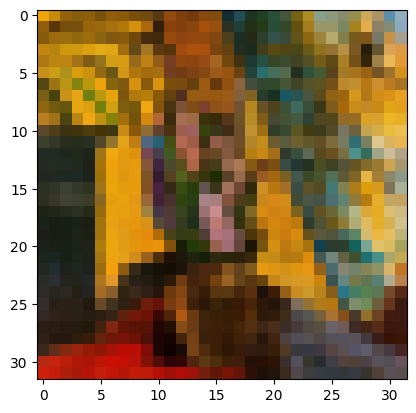

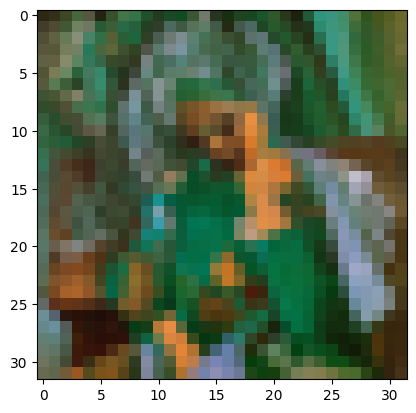

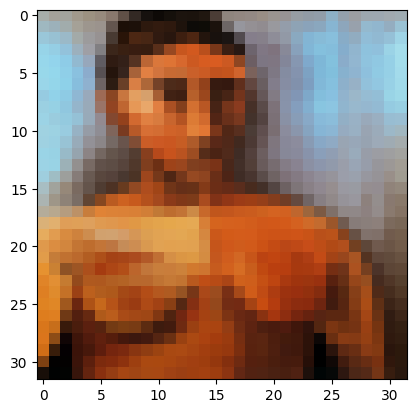

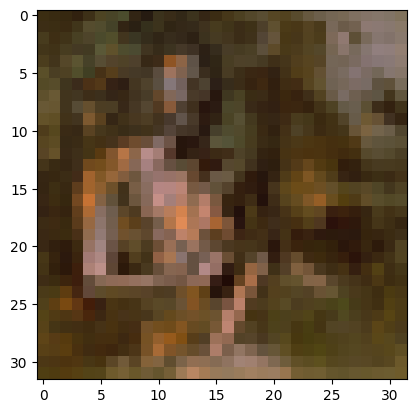

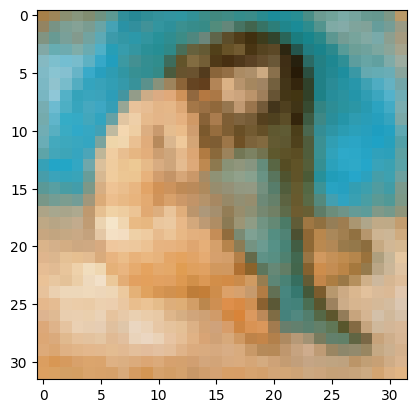

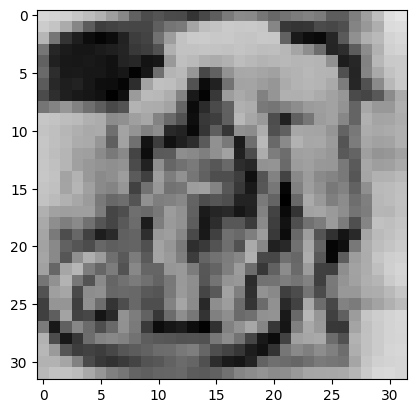

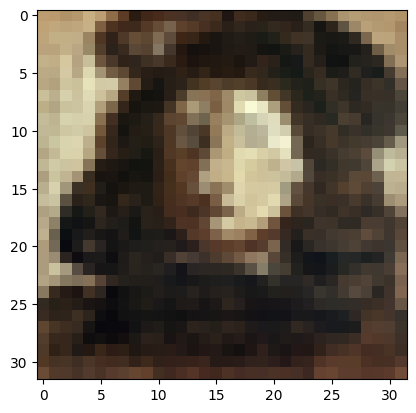

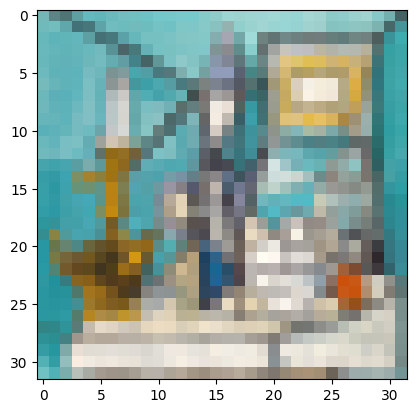

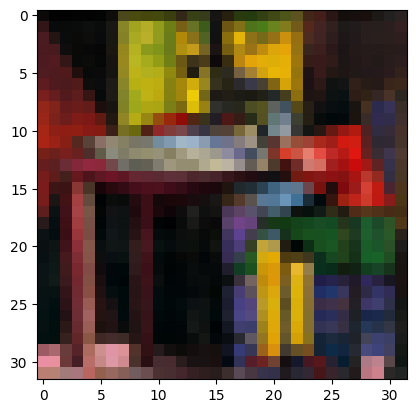

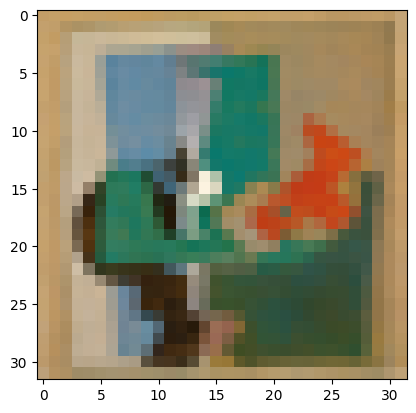

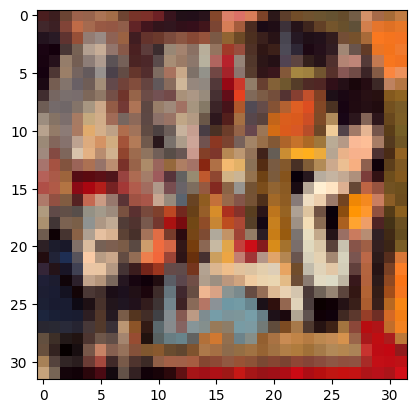

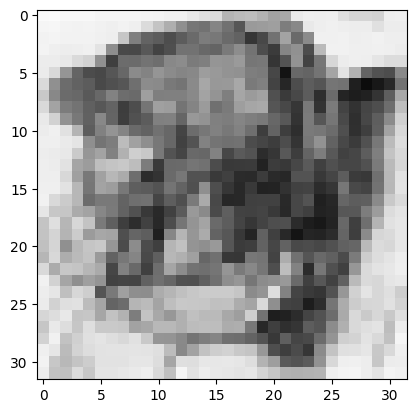

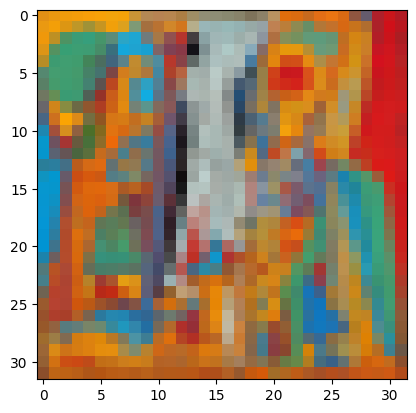

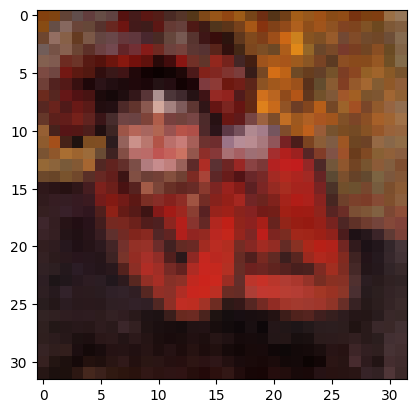

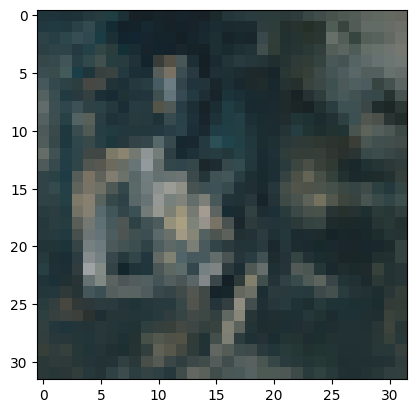

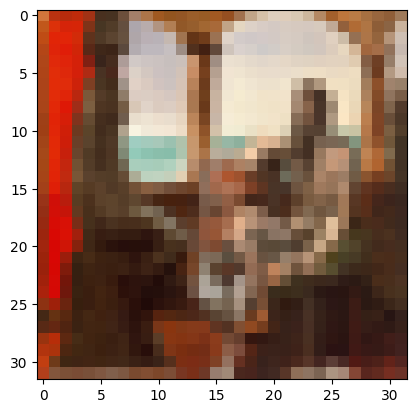

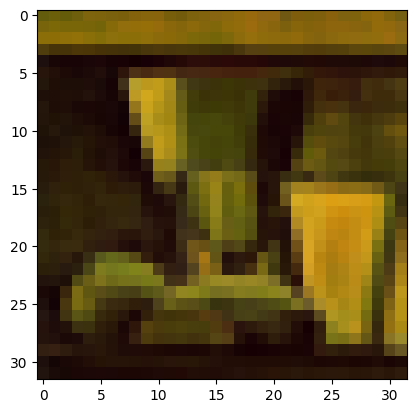

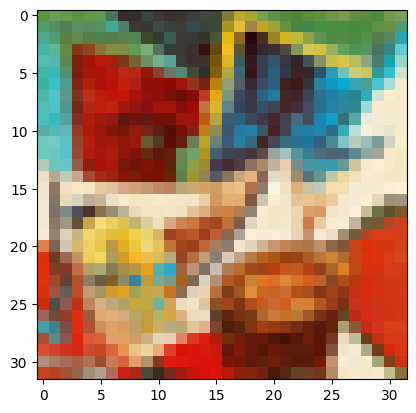

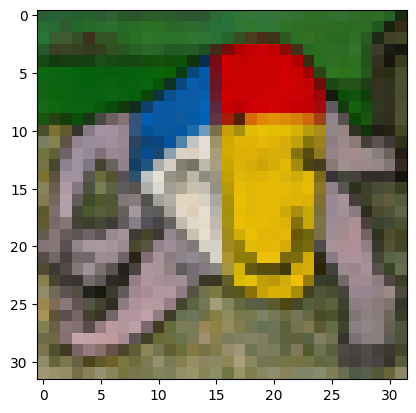

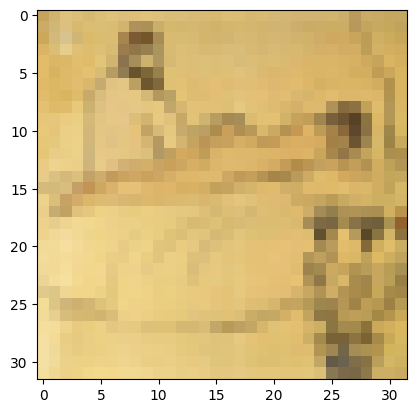

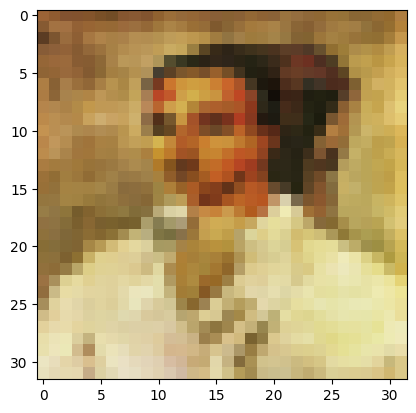

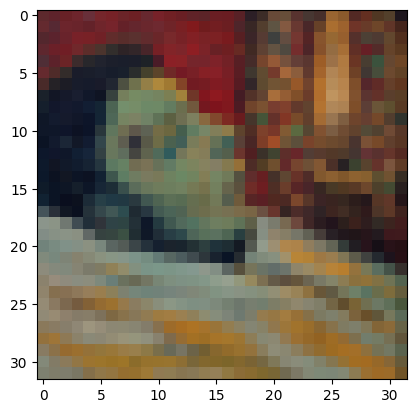

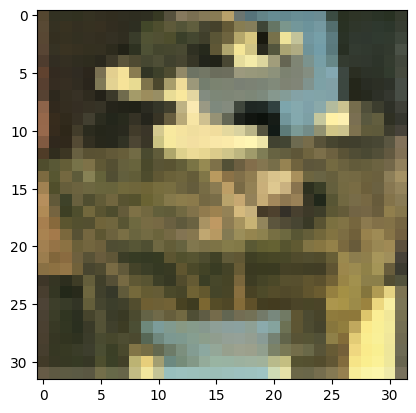

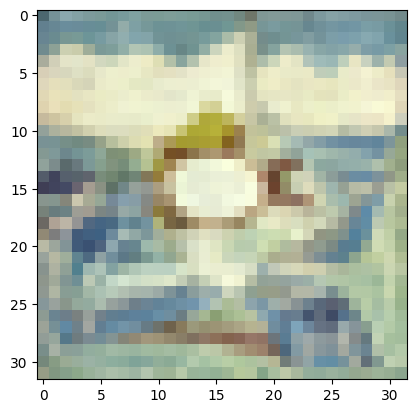

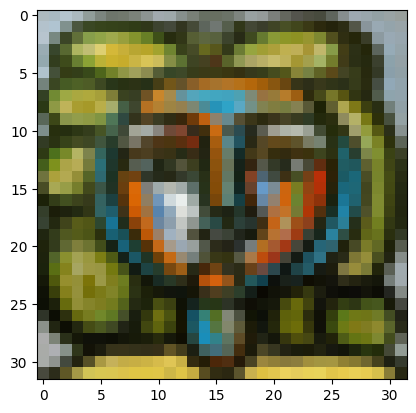

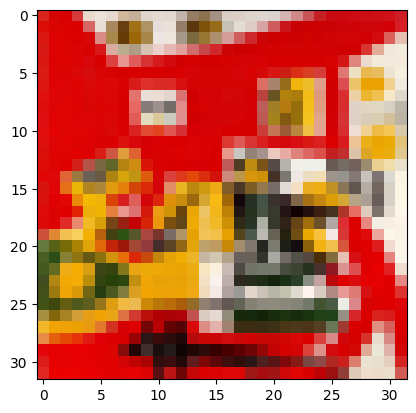

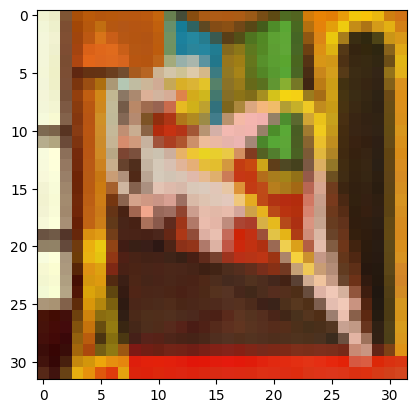

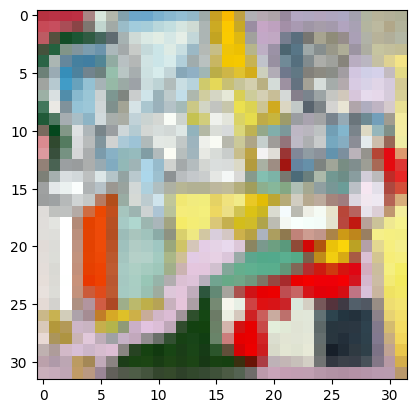

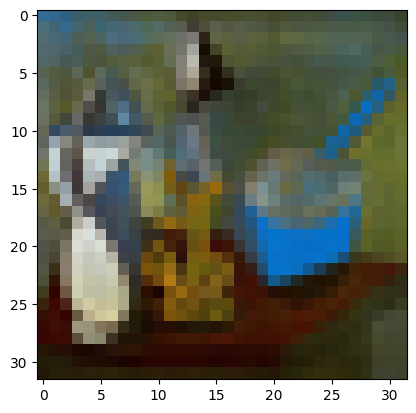

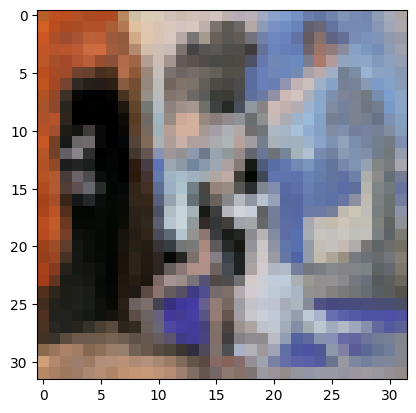

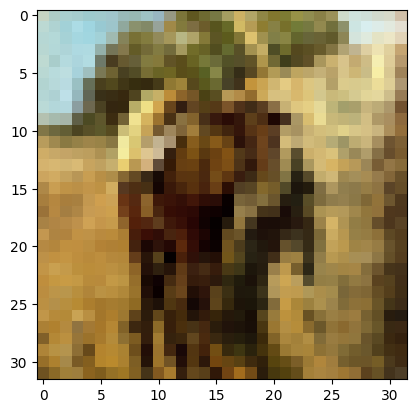

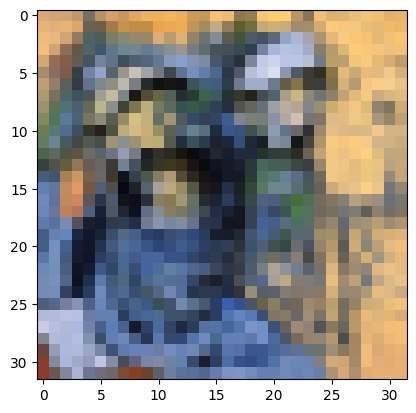

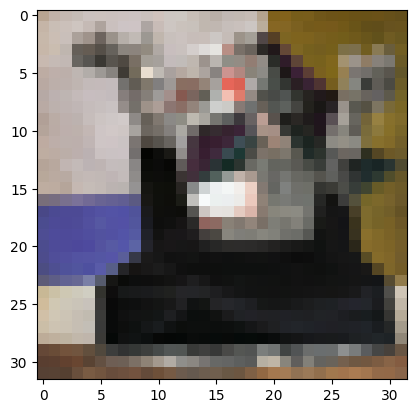

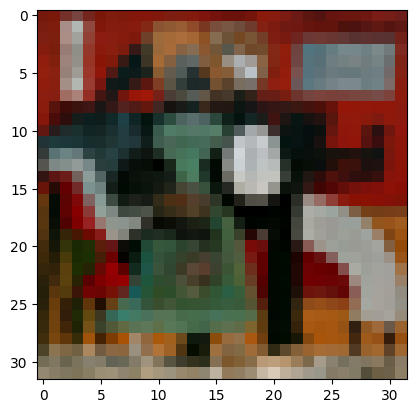

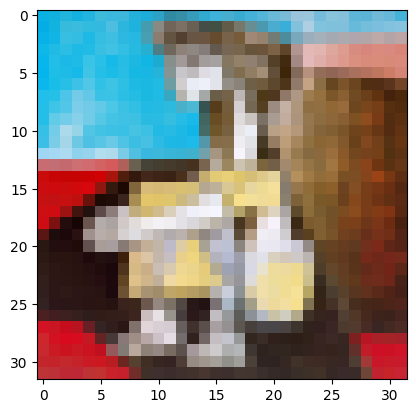

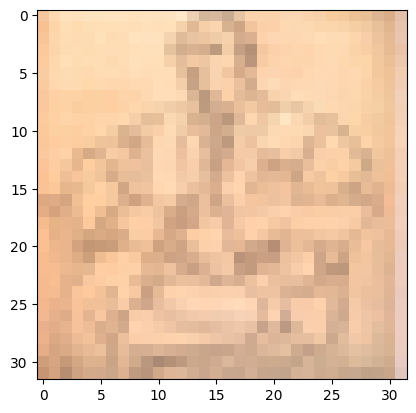

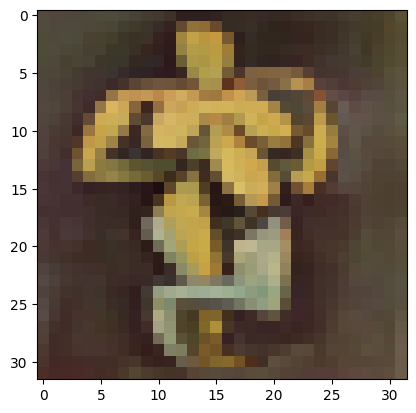

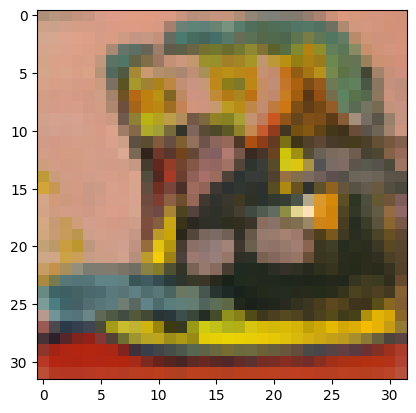

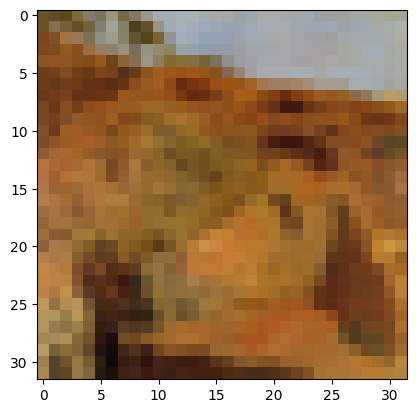

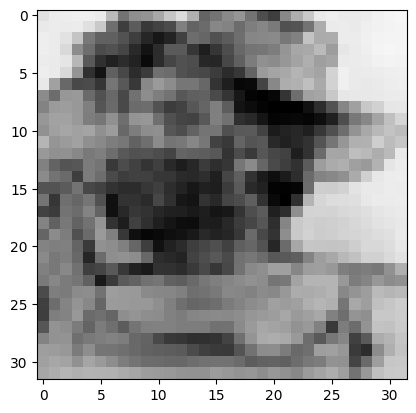

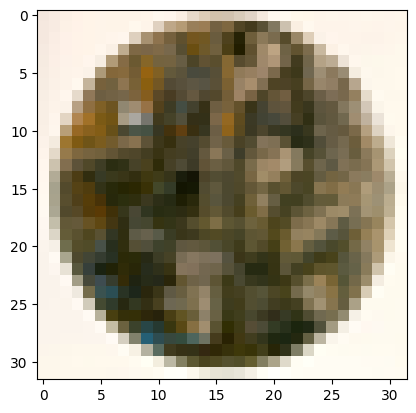

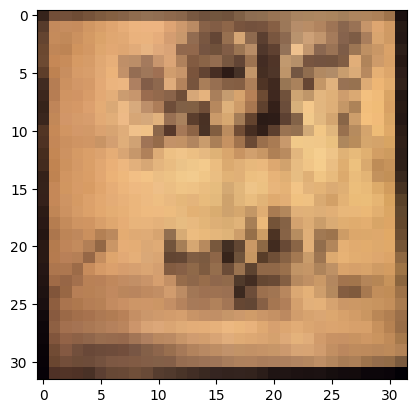

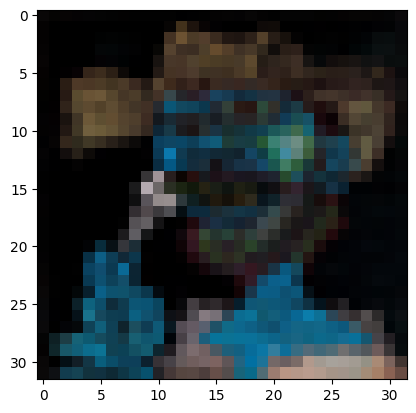

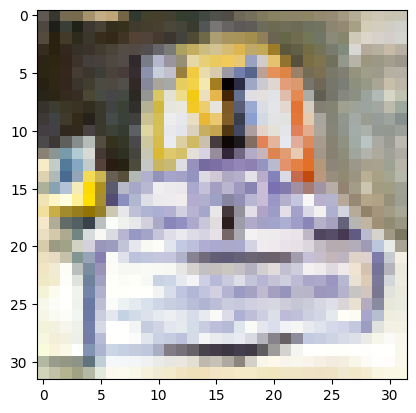

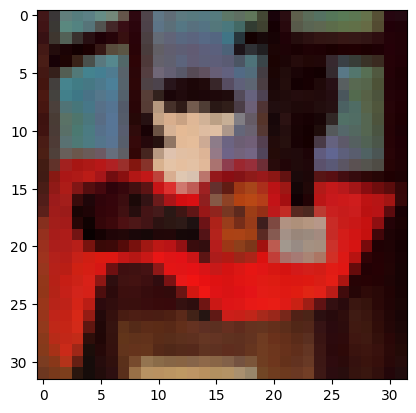

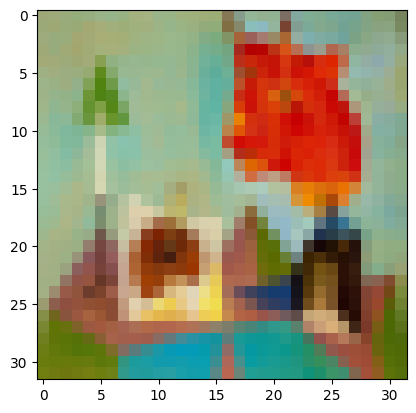

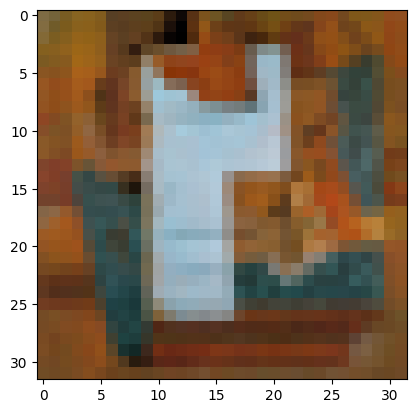

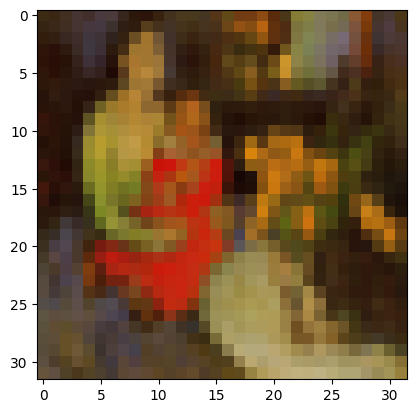

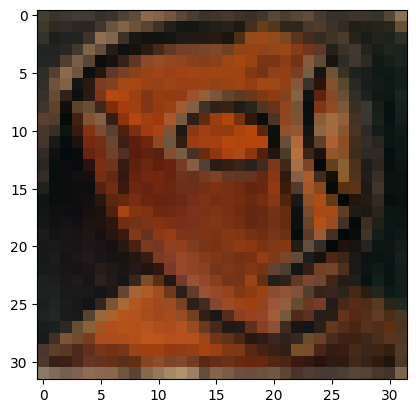

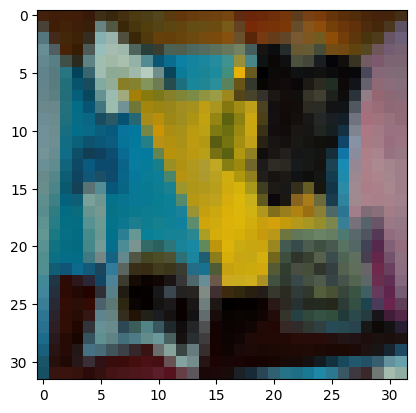

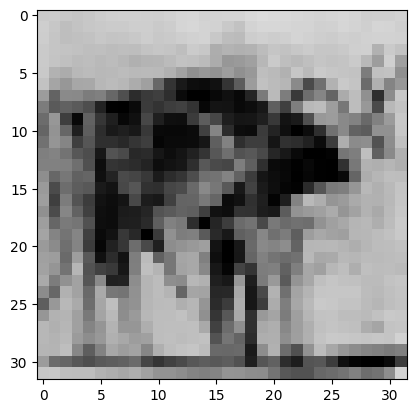

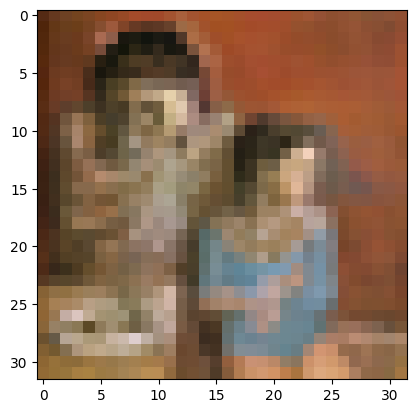

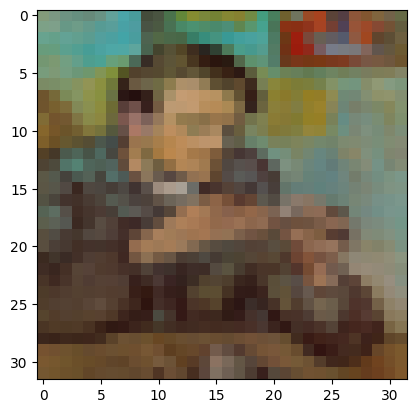

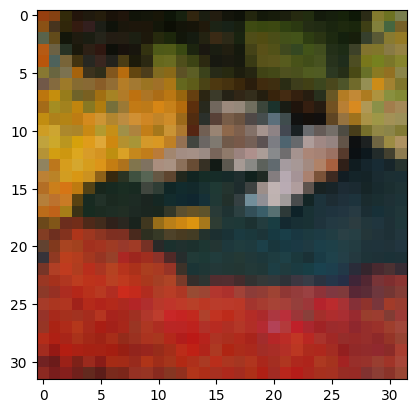

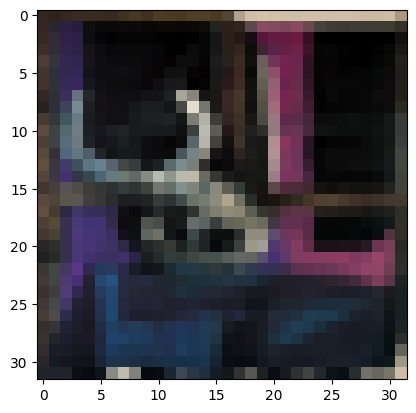

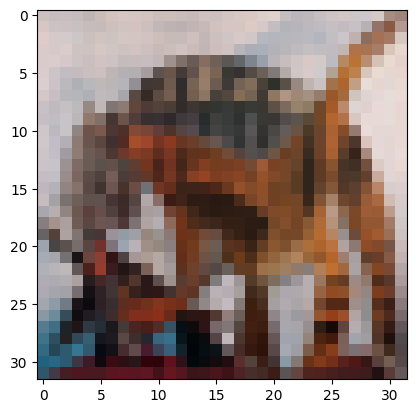

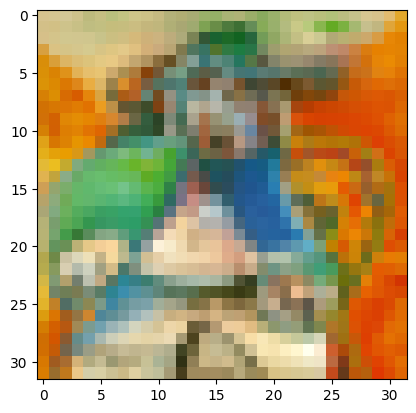

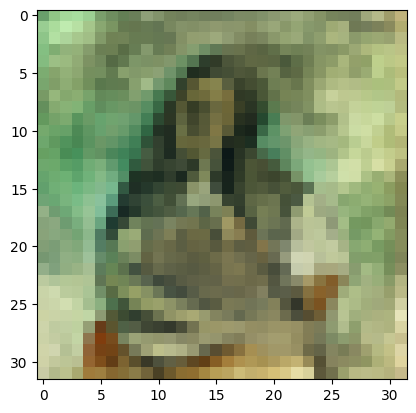

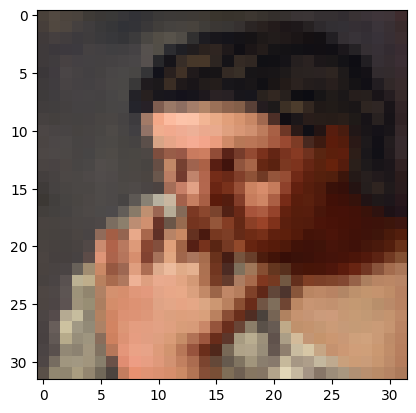

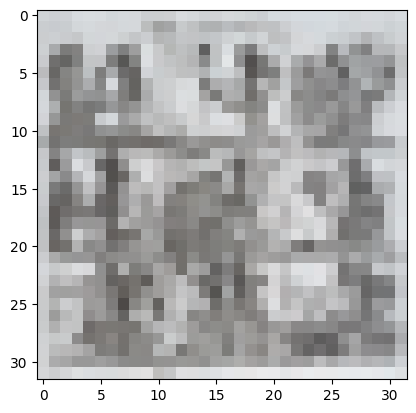

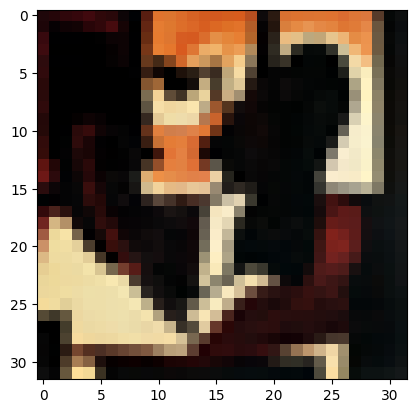

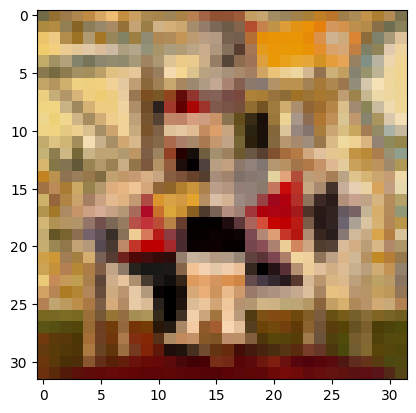

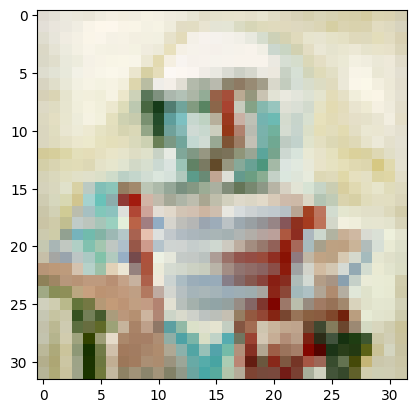

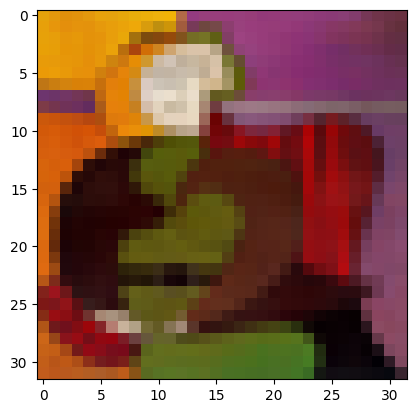

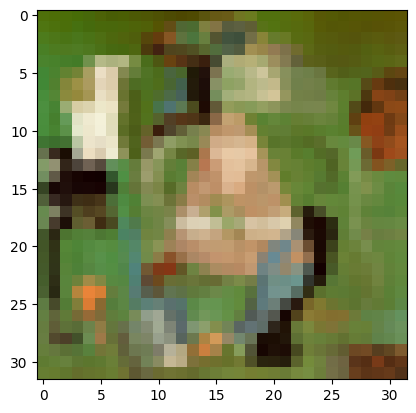

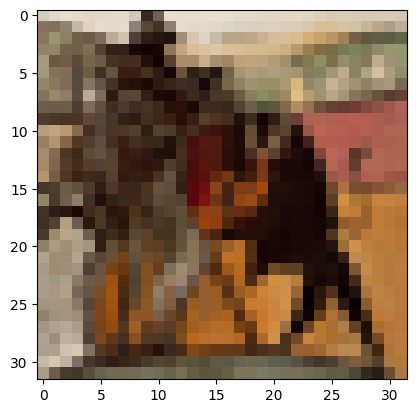

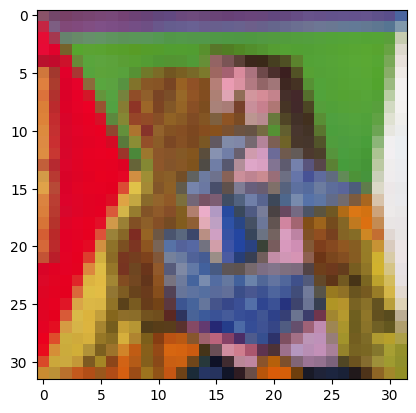

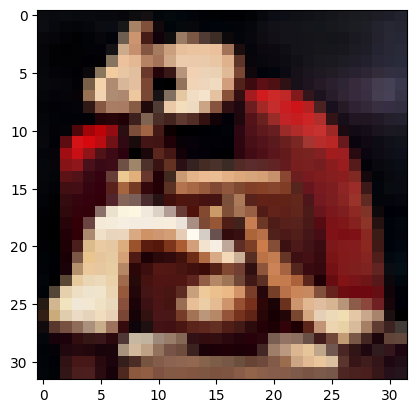

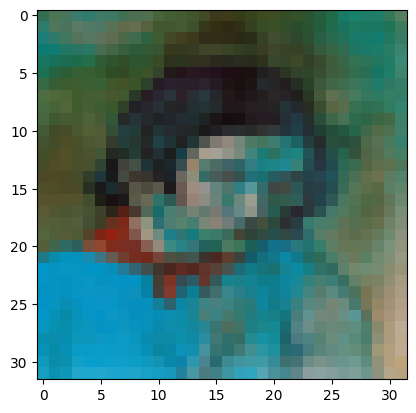

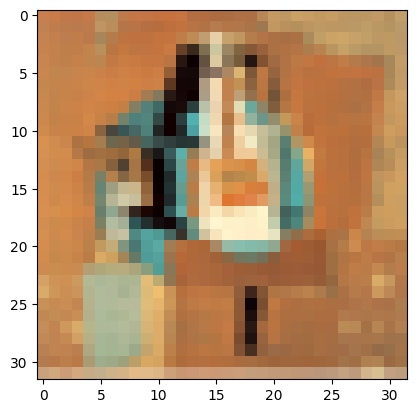

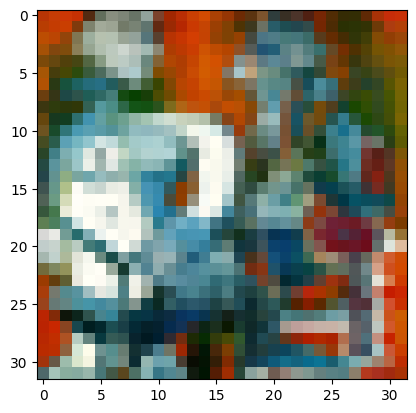

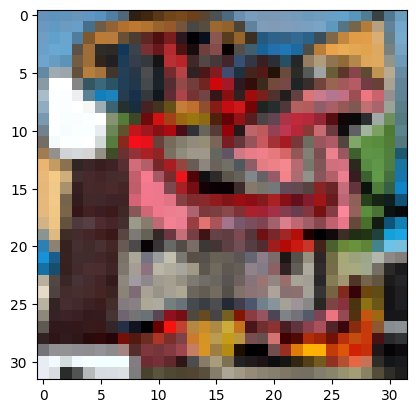

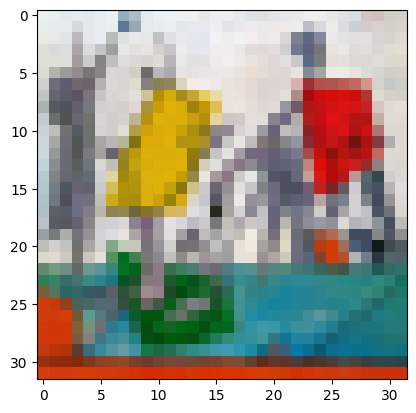

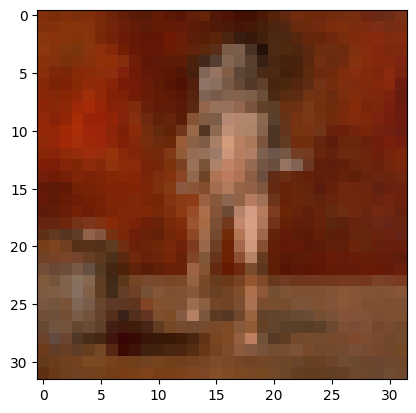

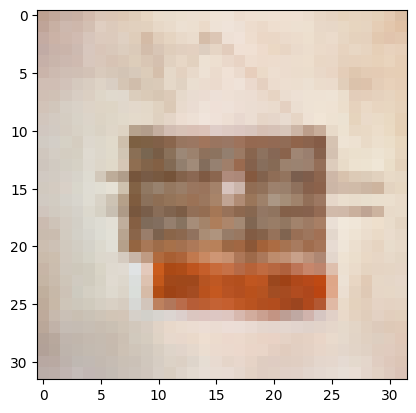

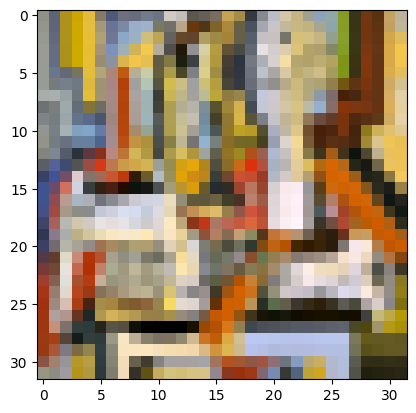

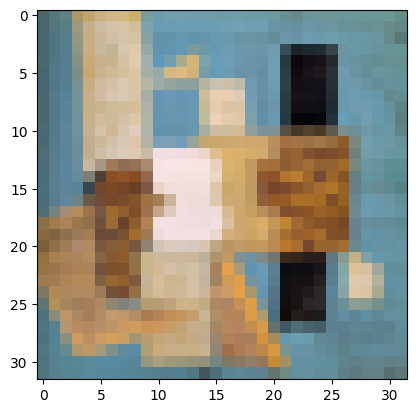

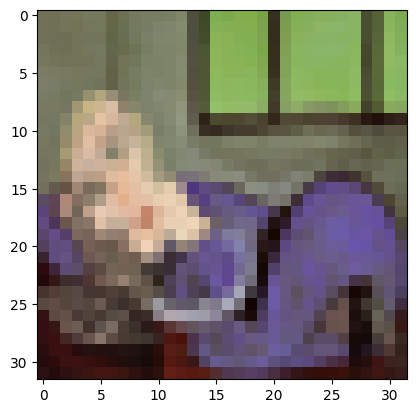

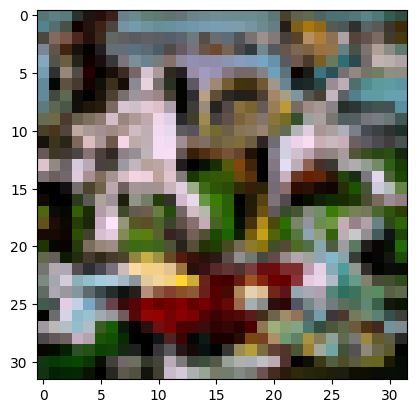

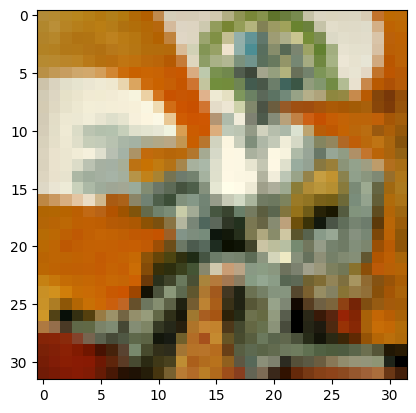

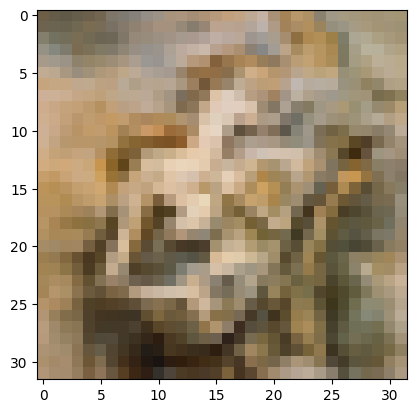

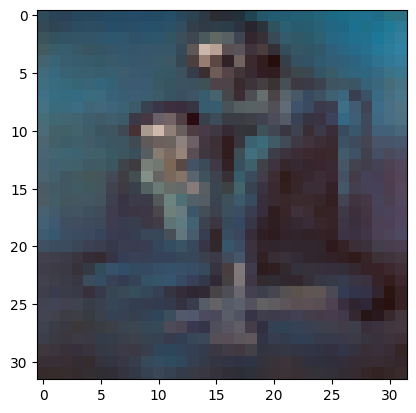

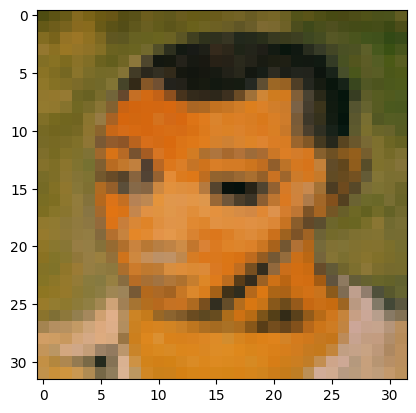

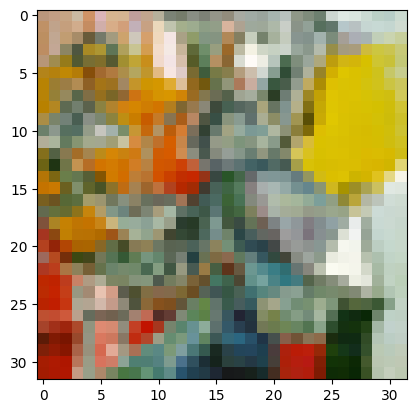

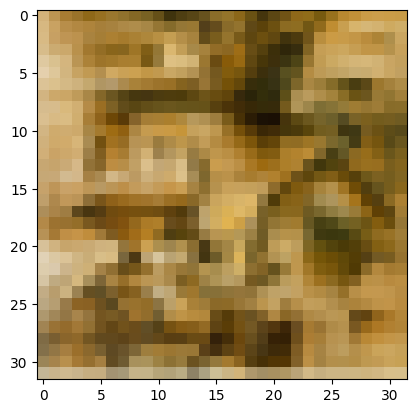

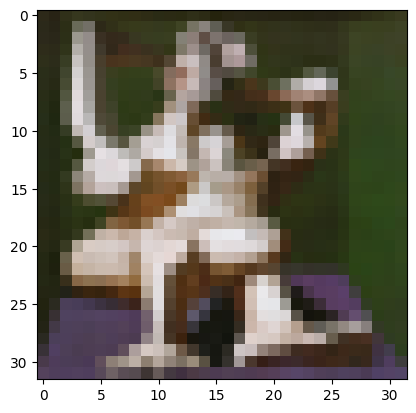

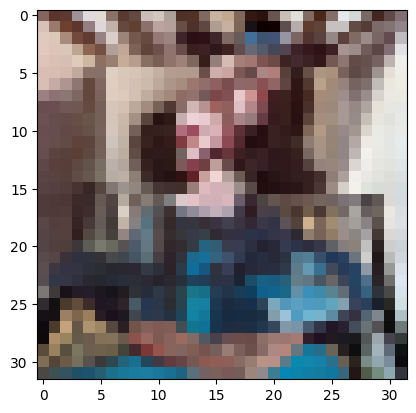

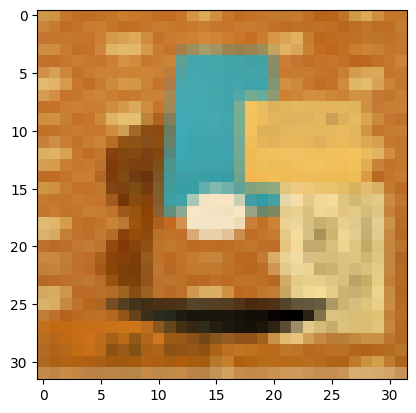

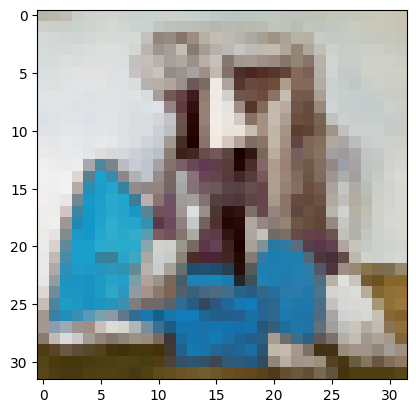

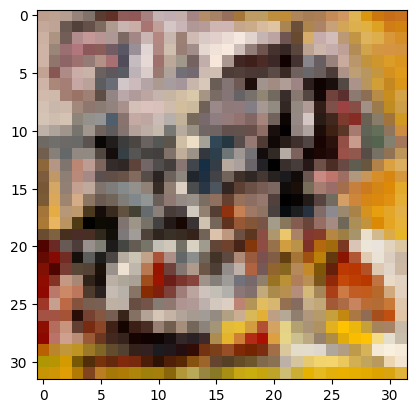

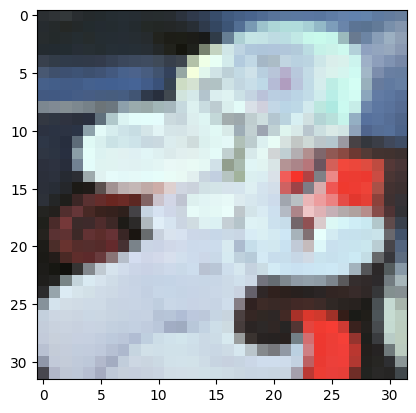

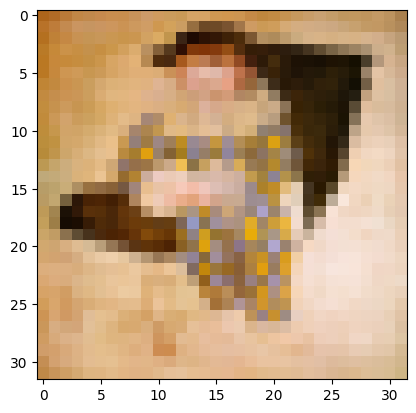

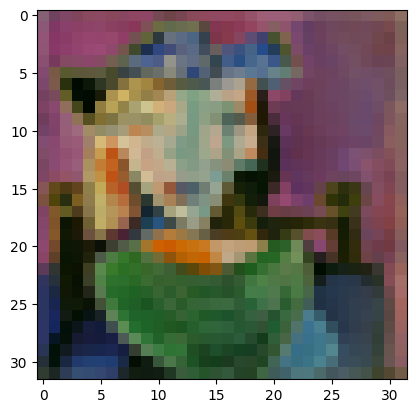

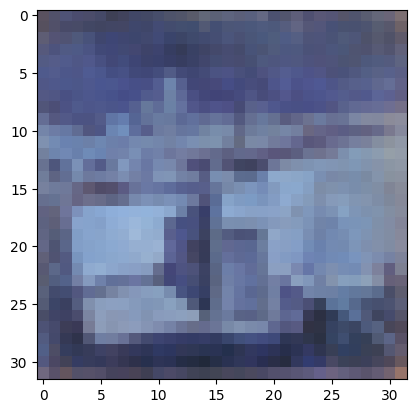

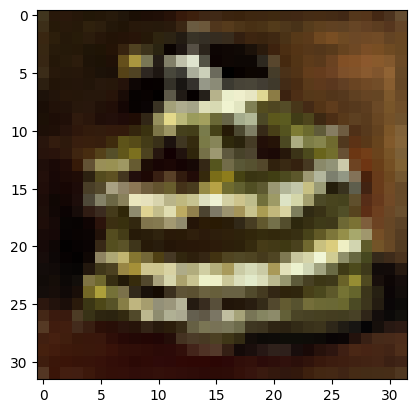

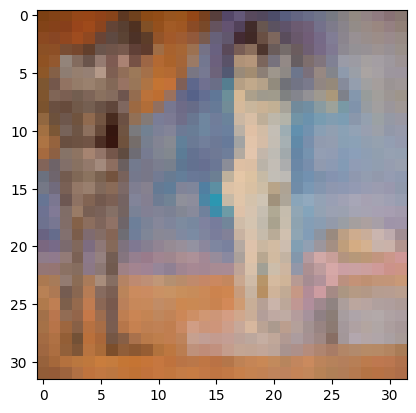

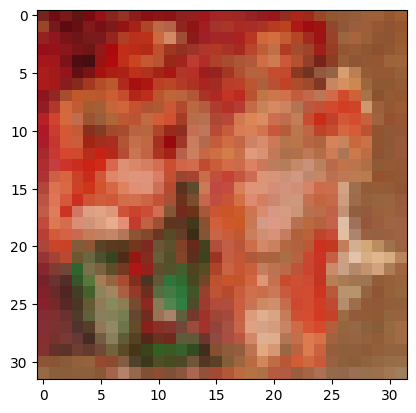

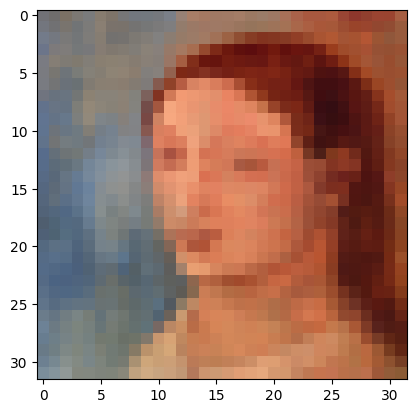

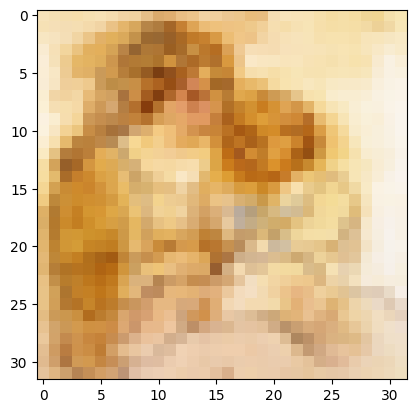

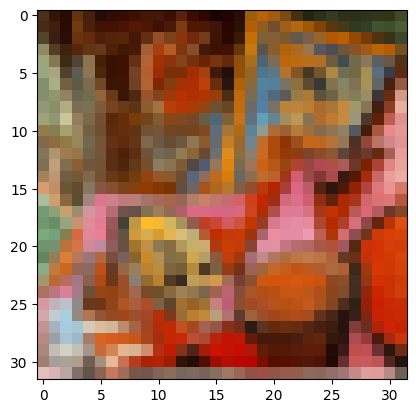

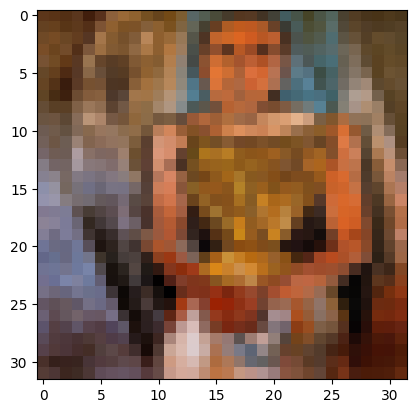

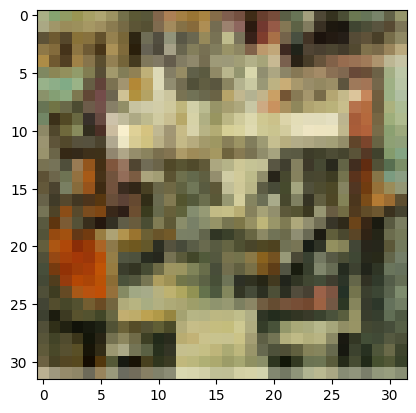

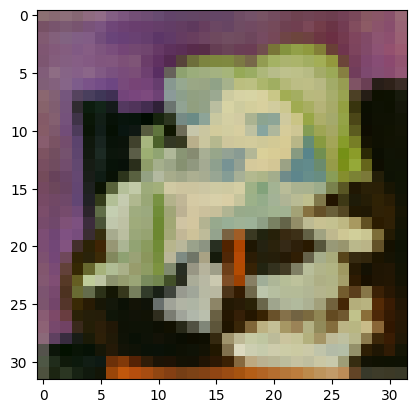

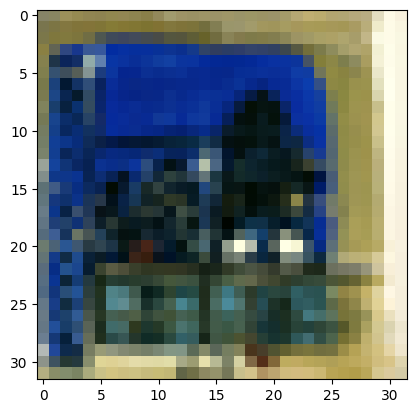

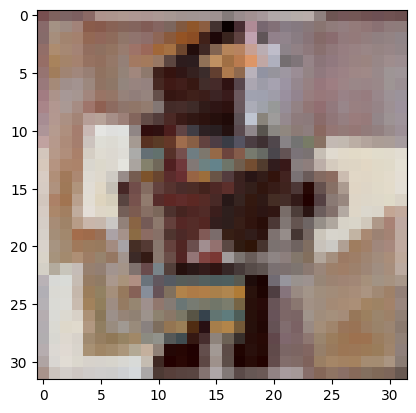

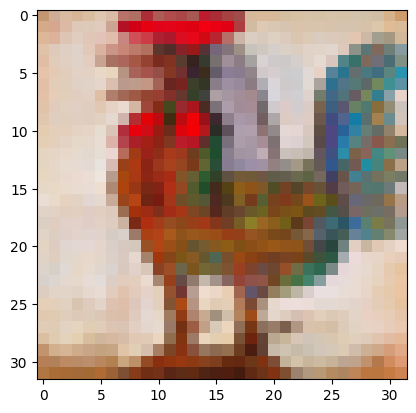

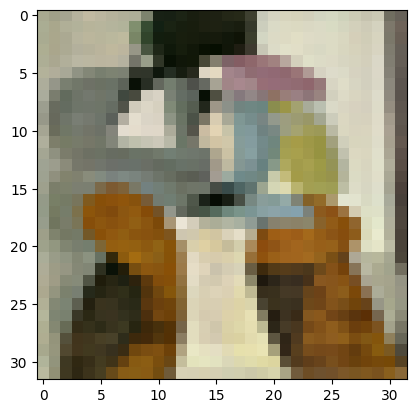

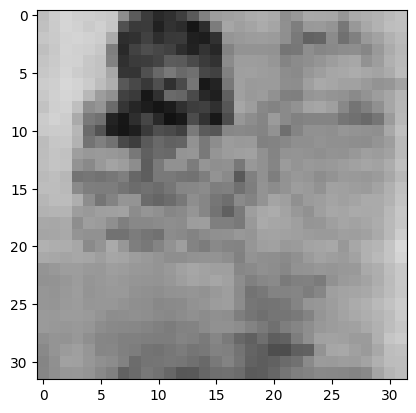

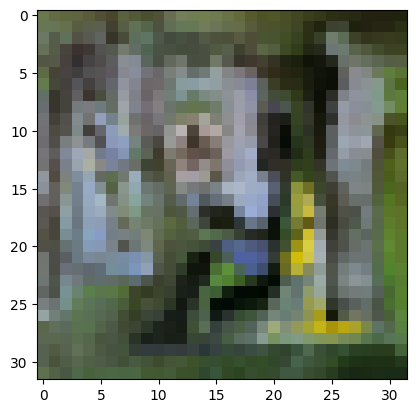

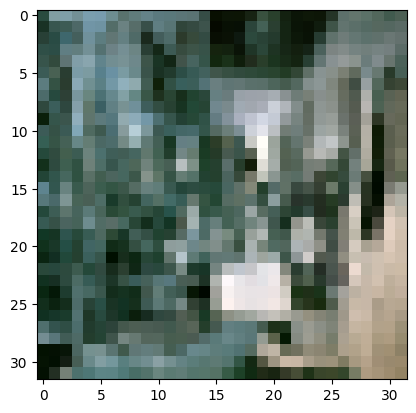

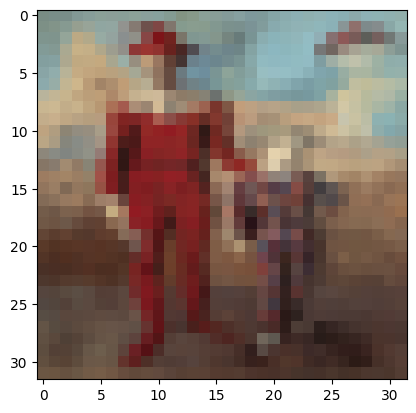

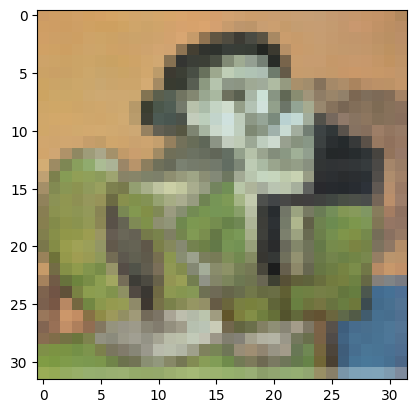

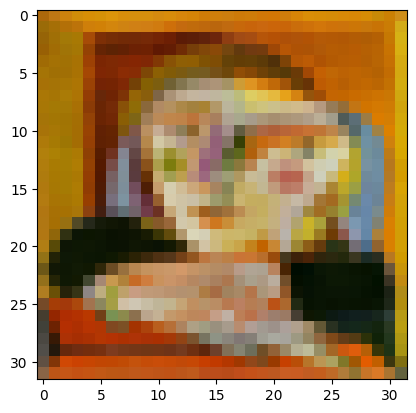

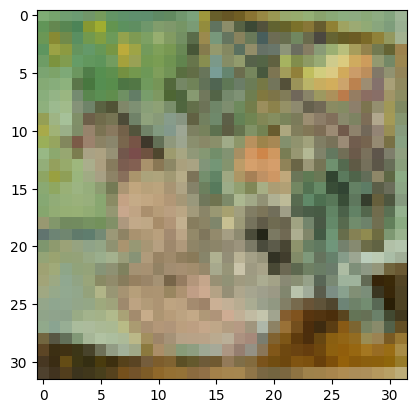

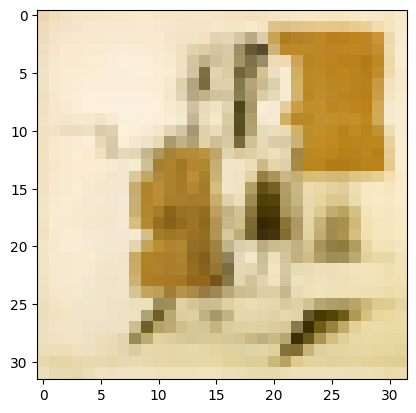

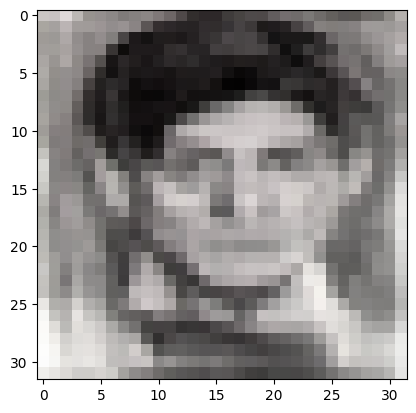

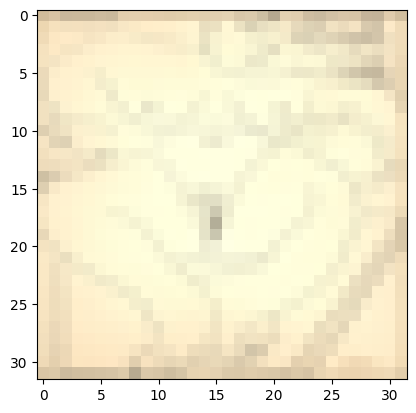

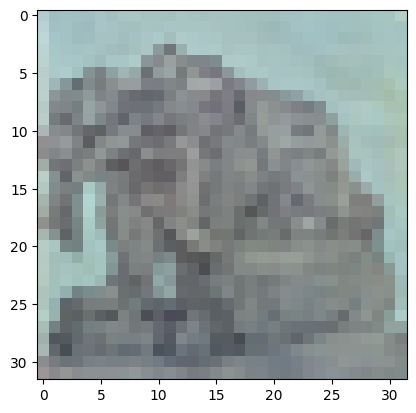

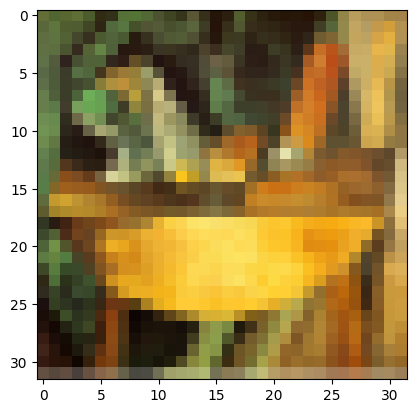

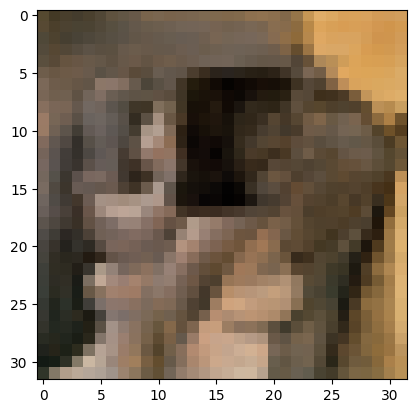

In [59]:
for img in list(df_famous[df_famous.artist=='Pablo Picasso'].image):
    plt.imshow(img)
    plt.show()